The purpose of this notebook is to evaluate GPDs $G_q(x,\eta,t)$ as well as their conformal moments $\mathbb{G}_q(n,\eta,t)$, where, for a generic GPD, we have its conformal moment expansion
\begin{equation}
G_q(x,\eta,t)=\sum_{n=0}^\infty (-1)^{n}p_n(x,\eta)\mathbb{F}_q(n,\eta,t),\qquad G_g(x,\eta,t)=\sum_{n=1}^\infty (-1)^{n-1}\, {^g\!p}_n(x,\eta) \mathbb{G}_g(n,\eta,t),
\end{equation}
where $G=H,E,\widetilde{H},\widetilde{E},H^T,E^T,\widetilde{H}^T,\widetilde{E}^T$.

To this end, we import the MSTW PDF parametrization of PDFs. The conformal moments are obtained by Reggeized $x$ integrals over PDFs at some input scale $\mu_0=1$ GeV and evolved using the pertinent RGEs. THe GPDs are reconstructed using the expansion in conformal partial waves and pertinent Mellin-Barnes integrals to resum their expansion in conformal moments.

In [4]:
# Import necessary libraries and set display options
import numpy as np
# import mpmath as mp
# import matplotlib.pyplot as plt
# from scipy.integrate import quad, trapezoid
# from joblib import Parallel, delayed
# from scipy.special import gamma, digamma

# import time
# import re
# import os

# from mstw_pdf import (
#     plot_uv_minus_dv_pdf, 
#     plot_uv_plus_dv_plus_S_pdf,
#     plot_gluon_pdf
# )

# from aac_pdf import(
#     plot_polarized_uv_minus_dv_pdf,
#     plot_polarized_uv_plus_dv_plus_S_pdf,
#     plot_polarized_gluon_pdf
#     )

from stringy_gpds import (
    plot_gpds,plot_gpd_data,
    plot_moments_on_grid,plot_moment,
    evolve_conformal_moment,first_singlet_moment,
    evolve_singlet_D,gluon_helicity,
    quark_helicity, spin_orbit_corelation, total_spin,
    orbital_angular_momentum,
    plot_fourier_transform_singlet_helicity,
    plot_fourier_transform_quark_helicity,
    plot_fourier_transform_quark_spin_orbit_correlation,
    plot_fourier_transform_singlet_spin_orbit_correlation,
    plot_fourier_transform_quark_orbital_angular_momentum,
    plot_fourier_transform_transverse_moments,
    plot_spin_orbit_correlation
)
# Set display options
np.set_printoptions(linewidth=200)

/home/hechenvanmountain/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


Time for plot computation for parameters (eta,t) = ((0.0, -0.69)): 0.032635 seconds
Time for plot computation for parameters (eta,t) = ((0.33, -0.69)): 0.027462 seconds
Time for plot computation for parameters (eta,t) = ((0.0, -0.39)): 0.027909 seconds
Time for plot computation for parameters (eta,t) = ((0.0, -0.17)): 0.028804 seconds


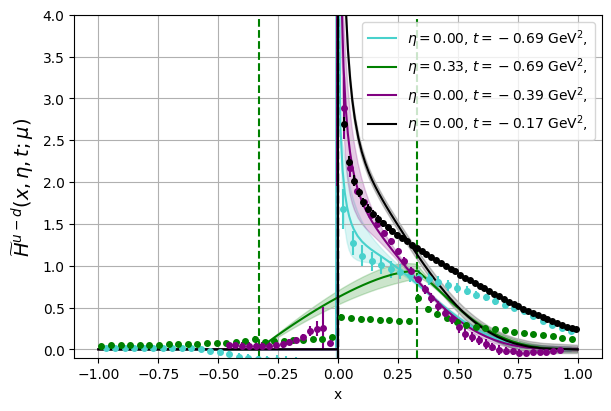

In [3]:
from stringy_gpds import plot_gpd_data
plot_gpd_data(gpd_label="Htilde",write_to_file=False,read_from_file=True,y_1=4)

In [1]:
from mstw_pdf import uv_plus_dv_plus_S_pdf, uv_minus_dv_pdf, gluon_pdf
from aac_pdf import polarized_uv_minus_dv_pdf, polarized_uv_plus_dv_plus_S_pdf, polarized_gluon_pdf
print(uv_minus_dv_pdf(.2,evolution_order="LO"))
print(uv_plus_dv_plus_S_pdf(.2,evolution_order="LO"))
print(.2 * gluon_pdf(.2,evolution_order="LO"))
print(polarized_uv_minus_dv_pdf(.2,evolution_order="LO"))
print(polarized_uv_plus_dv_plus_S_pdf(.2,evolution_order="LO"))
print(.2 * polarized_gluon_pdf(.2,evolution_order="LO"))

1.6687453598984037
6.0831006632553155
0.7513586940977057
1.932055392941313
0.47381399813344616
0.3683207081715064


In [5]:
from stringy_gpds import mellin_barnes_gpd
print(mellin_barnes_gpd(.2,1e-6,-1e-6,1,moment_type="non_singlet_isovector"))
print(mellin_barnes_gpd(.2,1e-6,-1e-6,1))
print(mellin_barnes_gpd(.2,1e-6,-1e-6,1,particle="gluon"))

print(mellin_barnes_gpd(.2,1e-6,-1e-6,1,moment_type="non_singlet_isovector",moment_label="Atilde"))
print(mellin_barnes_gpd(.2,1e-6,-1e-6,1,moment_label="Atilde"))
print(mellin_barnes_gpd(.2,1e-12,-1e-12,1,particle="gluon",moment_label="Atilde"))

1.668351902364253
6.083194607549831
0.7520966656983583
1.9336234190035926
0.47733082405520716
0.3685339515093612


In [11]:
from stringy_gpds import evolve_alpha_s, gamma_qq, gamma_qq_nd, non_singlet_isovector_moment, non_singlet_isoscalar_moment
from mstw_pdf import get_alpha_s
moment_type = "non_singlet_isovector"
evolve_type = "vector"
interolation = True
evolution_order = "NLO"
moment_label = "A"
error_type = "central"

eta = .1
t = -.2
mu = 2
Nf = 3
j = 2 -3j

Nc = 3
c_a = Nc
c_f = (Nc**2-1)/(2*Nc)
beta_0 = 2/3* Nf - 11/3 * Nc
beta_1 = 10/3 * c_a * Nf + 2 * c_f * Nf -34/3 * c_a**2


# Extract fixed quantities
alpha_s_in = get_alpha_s(evolution_order)
alpha_s_evolved = evolve_alpha_s(mu,Nf,evolution_order)

alpha_frac  = (alpha_s_in/alpha_s_evolved)  

ga_qq = gamma_qq(j-1,Nf,moment_type,evolve_type,"LO",interpolation=False)

def E_non_singlet_nlo(j):
    ga_qq = gamma_qq(j,Nf,moment_type,evolve_type,"LO",interpolation=False)
    # print("lo",j,ga_qq)
    ga_qq_nlo = gamma_qq(j,Nf,moment_type,evolve_type,"NLO",interpolation=True)
    # print("nlo",j,ga_qq_nlo)
    result = alpha_frac**(ga_qq/beta_0) * (1 + (.5 * beta_1/beta_0**2 *  ga_qq - ga_qq_nlo/beta_0) * \
                                    (alpha_s_evolved - alpha_s_in)/(2*np.pi)
                                    )
    # print("res",j,result)
    return result
def B_non_singlet_nlo(k):
    gamma_term = (ga_qq - gamma_qq(k,Nf,moment_type,evolve_type,"LO",interpolation=False) + beta_0)
    ga_nd = 1# gamma_qq_nd(j-1,k,Nf,evolve_type,evolution_order,interpolation=False)
    result = alpha_s_evolved/(2*np.pi) * ga_nd/gamma_term * (
        1 - alpha_frac**(gamma_term/beta_0)
    )
    if j - 1 == k:
        result += 1
    return result

def EB_non_singlet_nlo(k):
    # Combinede function to call in fractional_finite_sum
    if moment_type == "non_singlet_isovector":
        moment_k  = non_singlet_isovector_moment(k,eta,t,moment_label,evolve_type,evolution_order,error_type)
    else:
        moment_k  = non_singlet_isoscalar_moment(k,eta,t,moment_label,evolve_type,evolution_order,error_type)
    non_diagonal_terms = eta**(j - k) * B_non_singlet_nlo(k-1) * E_non_singlet_nlo(k-1) * moment_k
    # print(j,k,non_diagonal_terms)
    return non_diagonal_terms

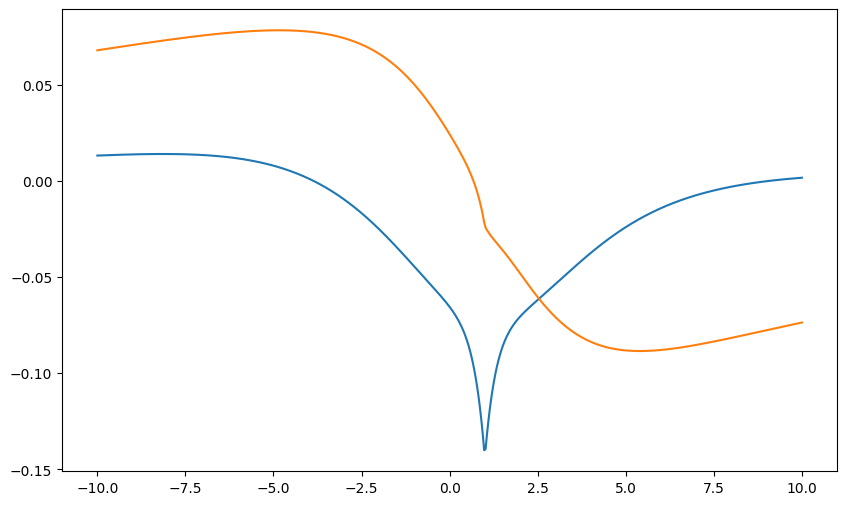

In [10]:
from stringy_gpds import gamma_qq_nd, conformal_anomaly_qq, d_element, power_minus_1, heaviside_theta,non_singlet_isovector_moment
import numpy as np
import mpmath as mp
from joblib import Parallel, delayed
import matplotlib.pyplot as plt

j = 5+1j
k_range = np.linspace(-10,10,500)
k_vals = 1 + 1j * k_range

def func(k):
    # return non_singlet_isovector_moment(k,eta,t,evolution_order="NLO")
    # return heaviside_theta(j,k)
    # return E_non_singlet_nlo(k-1)

    # This is the culprit! in particular gamma_qq_nd
    # return B_non_singlet_nlo(k-1)

    # return EB_non_singlet_nlo(k-1)
    # return gamma_qq_nd(j-1,k-1,evolution_order="NLO",interpolation=False)
    return d_element(j,k)
    # return conformal_anomaly_qq(j,k)

# print(d_element(j,2+1j),d_element(j,2-1j))
# print(conformal_anomaly_qq(j,2+1j),conformal_anomaly_qq(j,2-1j))
# print(func(2+ 10j),func(2-10j))

vals = np.array(Parallel(n_jobs=-1)(delayed(func)(k) for k in k_vals))

vals_re = np.array([float(mp.re(x)) for x in vals])
vals_im = np.array([float(mp.im(x)) for x in vals])

plt.figure(figsize=(10, 6))
plt.plot(k_range,vals_re,label=f"real")
plt.plot(k_range,vals_im,label=f"imag")


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from stringy_gpds import integral_uv_pdf_regge, integral_dv_pdf_regge,integral_polarized_dv_pdf_regge,integral_polarized_uv_pdf_regge,integral_S_pdf_regge,integral_polarized_S_pdf_regge,integral_gluon_pdf_regge
import matplotlib.pyplot as plt
from helpers import error_sign

def fit_non_singlet_slopes(evolution_order="LO",error_type="central",plot = True):
    m_F12 = 0.71
    mu_p = 2.7928
    mu_n = -1.913
    mp2 = 0.9382**2
    m_a_iv_2 = 1.322**2
    m_a_is_2 = 1.736**2
    gA_ud_iv = 1.2723
    gA_ud_is = 0.416
    def Ge_p(t):
        return 1/(1-t/m_F12)**2
    def Gm_p(t):
        return mu_p * Ge_p(t)
    def Ge_n(t):
        return 0
    def Gm_n(t):
        return mu_n * Ge_p(t)
    def F_1p(t):
        num = Ge_p(t) - t/(4*mp2)*Gm_p(t)
        den = 1 - t/(4*mp2)
        return num/den
    def F_1n(t):
        num = Ge_n(t) - t/(4*mp2)*Gm_n(t)
        den = 1 - t/(4*mp2)
        return num/den
    def F_2p(t):
        num = Gm_p(t) - Ge_p(t)
        den = 1 - t/(4*mp2)
        return num/den
    def F_2n(t):
        num = Gm_n(t) - Ge_n(t)
        den = 1 - t/(4*mp2)
        return num/den
    def G_a_isovector(t):
        return gA_ud_iv/(1-t/(m_a_iv_2))**2
    def G_a_isoscalar(t):
        return gA_ud_is/(1-t/(m_a_is_2))**2
    
    def non_singlet_isovector(t, norm, alpha_p):
        uv, err_u = integral_uv_pdf_regge(1,0,alpha_p,t,evolution_order,error_type=error_type)
        dv, err_d = integral_dv_pdf_regge(1,0,alpha_p,t,evolution_order,error_type=error_type)
        err = error_sign(np.sqrt(err_u**2 + err_d**2),error_type)
        return norm * (uv - dv + err)
    def non_singlet_isovector_vec(t_arr, norm, alpha_p):
        return np.array([
           non_singlet_isovector(t,norm,alpha_p)
            for t in t_arr
        ], dtype=float)
    def non_singlet_isoscalar(t, norm, alpha_p):
        uv, err_u = integral_uv_pdf_regge(1,0,alpha_p,t,evolution_order,error_type=error_type)
        dv, err_d = integral_dv_pdf_regge(1,0,alpha_p,t,evolution_order,error_type=error_type)
        err = error_sign(np.sqrt(err_u**2 + err_d**2),error_type)
        return norm * (uv + dv + err)
    def non_singlet_isoscalar_vec(t_arr, norm, alpha_p):
        return np.array([
           non_singlet_isoscalar(t,norm,alpha_p)
            for t in t_arr
        ], dtype=float)
    def polarized_non_singlet_isovector(t, norm, alpha_p):
        uv, err_u = integral_polarized_uv_pdf_regge(1,0,alpha_p,t,evolution_order,error_type=error_type)
        dv, err_d = integral_polarized_dv_pdf_regge(1,0,alpha_p,t,evolution_order,error_type=error_type)
        err = error_sign(np.sqrt(err_u**2 + err_d**2),error_type)
        return norm * (uv - dv + err)
    def polarized_non_singlet_isovector_vec(t_arr, norm, alpha_p):
        return np.array([
           polarized_non_singlet_isovector(t,norm,alpha_p)
            for t in t_arr
        ], dtype=float)
    def polarized_non_singlet_isoscalar(t, norm, alpha_p):
        uv, err_u = integral_polarized_uv_pdf_regge(1,0,alpha_p,t,evolution_order,error_type=error_type)
        dv, err_d = integral_polarized_dv_pdf_regge(1,0,alpha_p,t,evolution_order,error_type=error_type)
        err = error_sign(np.sqrt(err_u**2 + err_d**2),error_type)
        return norm * (uv + dv + err)
    def polarized_non_singlet_isoscalar_vec(t_arr, norm, alpha_p):
        return np.array([
           polarized_non_singlet_isoscalar(t,norm,alpha_p)
            for t in t_arr
        ], dtype=float)
    
    t_vals = np.linspace(0,-3,200)

    pseudo_data_isovector_A = F_1p(t_vals) - F_1n(t_vals)
    pseudo_data_isoscalar_A = 3 * (F_1p(t_vals) + F_1n(t_vals))
    pseudo_data_isovector_B = F_2p(t_vals) - F_2n(t_vals)
    pseudo_data_isoscalar_B = 3 * (F_2p(t_vals) + F_2n(t_vals))
    pseudo_data_isovector_Atilde = G_a_isovector(t_vals)
    pseudo_data_isoscalar_Atilde = G_a_isoscalar(t_vals)

    # blah = polarized_non_singlet_isovector(1,.5,t_vals)
    # plt.plot(-t_vals,pseudo_data_isovector_A)
    # plt.plot(-t_vals,pseudo_data_isoscalar_A)
    # plt.plot(-t_vals,pseudo_data_isovector_B)
    # plt.plot(-t_vals,pseudo_data_isoscalar_B)
    #  plt.plot(-t_vals,pseudo_data_isovector_Atilde)
    # plt.plot(-t_vals,pseudo_data_isoscalar_Atilde)
    # plt.plot(-t_vals,blah)
    # return

    # print(pseudo_data_isovector_A)
    # print(pseudo_data_isovector_B)
    # print(pseudo_data_isoscalar_A)
    # print(pseudo_data_isoscalar_B)
    # print(pseudo_data_isovector_Atilde)
    # print(pseudo_data_isoscalar_Atilde)
    # return
    # Perform fits
    # A fits (non-polarized)[
    popt_A_iv, pcov_A_iv = curve_fit(non_singlet_isovector_vec, t_vals, pseudo_data_isovector_A, p0=[1,0.6], bounds=([1,.1],[1.0001,3]))
    popt_A_is, pcov_A_is = curve_fit(non_singlet_isoscalar_vec, t_vals, pseudo_data_isoscalar_A, p0=[1,1],bounds=([.1,.1],[5,3]))

    # B fits (non-polarized)
    popt_B_iv, pcov_B_iv = curve_fit(non_singlet_isovector_vec, t_vals, pseudo_data_isovector_B, p0=[4,1.5],bounds=([2,1],[6,3]))
    popt_B_is, pcov_B_is = curve_fit(non_singlet_isoscalar_vec, t_vals, pseudo_data_isoscalar_B, p0=[-0.1,1.1],bounds=([-2,1],[-.1,3]))

    # Atilde fits (polarized)
    popt_Atilde_iv, pcov_Atilde_iv = curve_fit(polarized_non_singlet_isovector_vec, t_vals, pseudo_data_isovector_Atilde, p0=[0.8,1],bounds=([.5,.1],[2,3]))
    popt_Atilde_is, pcov_Atilde_is = curve_fit(polarized_non_singlet_isoscalar_vec, t_vals, pseudo_data_isoscalar_Atilde, p0=[1.7,0.3],bounds=([.2,.1],[3,1.5]))

    # # Print or return the results
    print("Fitted parameters:")
    print(f"A isovector: norm = {popt_A_iv[0]:.4f}, alpha_p = {popt_A_iv[1]:.4f}")
    print(f"A isoscalar: norm = {popt_A_is[0]:.4f}, alpha_p = {popt_A_is[1]:.4f}")
    print(f"B isovector: norm = {popt_B_iv[0]:.4f}, alpha_p = {popt_B_iv[1]:.4f}")
    print(f"B isoscalar: norm = {popt_B_is[0]:.4f}, alpha_p = {popt_B_is[1]:.4f}")
    print(f"Atilde isovector: norm = {popt_Atilde_iv[0]:.4f}, alpha_p = {popt_Atilde_iv[1]:.4f}")
    print(f"Atilde isoscalar: norm = {popt_Atilde_is[0]:.4f}, alpha_p = {popt_Atilde_is[1]:.4f}")

    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_isovector_A, 'o', label='Pseudo-data A (iv)')
        plt.plot(-t_vals, non_singlet_isovector_vec(t_vals, *popt_A_iv), '-', label='Fit A (iv)')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_isoscalar_A, 'o', label='Pseudo-data A (is)')
        plt.plot(-t_vals, non_singlet_isoscalar_vec(t_vals, *popt_A_is), '-', label='Fit A (is)')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
    
    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_isovector_B, 'o', label='Pseudo-data B (iv)')
        plt.plot(-t_vals, non_singlet_isovector_vec(t_vals, *popt_B_iv), '-', label='Fit B (iv)')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_isoscalar_B, 'o', label='Pseudo-data B (is)')
        plt.plot(-t_vals, non_singlet_isoscalar_vec(t_vals, *popt_B_is), '-', label='Fit B (is)')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_isovector_Atilde, 'o', label='Pseudo-data Atilde (iv)')
        plt.plot(-t_vals, polarized_non_singlet_isovector_vec(t_vals, *popt_Atilde_iv), '-', label='Fit Atilde (iv)')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_isoscalar_Atilde, 'o', label='Pseudo-data Atilde (is)')
        plt.plot(-t_vals, polarized_non_singlet_isoscalar_vec(t_vals, *popt_Atilde_is), '-', label='Fit Atilde (is)')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

    return

from stringy_gpds import gluon_singlet_regge_A,gluon_singlet_regge_D, quark_singlet_regge_A, quark_singlet_regge_D
from config import MOMENTUM_SPACE_MOMENTS_PATH
def fit_singlet_slopes(Nf=3,evolution_order="LO",plot=True):
    # Dipole form from table III in 2310.08484
    g_A = 0.501
    m_A_g2 = 1.262**2
    g_D = -2.572
    m_D_g2 = 0.538**2

    q_A = 0.510
    m_A_q2 = 1.477**2
    q_D = -1.30
    m_D_q2 = 0.81**2

    def gluon_A(t):
        return g_A/(1-t/m_A_g2)**2
    def quark_A(t):
        return q_A/(1-t/m_A_q2)**2
    def gluon_D(t):
        return g_D/(1-t/m_D_g2)**2
    def quark_D(t):
        return q_D/(1-t/m_D_q2)**2

    def gluon_singlet_A(t,norm,alpha_p):
        res, _ = gluon_singlet_regge_A(2,0,t,alpha_p,moment_label="A",evolution_order=evolution_order)
        return norm*res
    def quark_singlet_A(t,norm,alpha_p):
        res, _ = quark_singlet_regge_A(2,0,t,Nf,alpha_p,moment_label="A",evolution_order=evolution_order)
        return norm*res
    
    # Generate pseudo data
    t_vals = np.linspace(-1e-6,-2,100)

    pseudo_data_gluon_A = gluon_A(t_vals)
    pseudo_data_quark_A = quark_A(t_vals)
    pseudo_data_gluon_D = gluon_D(t_vals)
    pseudo_data_quark_D = quark_D(t_vals)
    
    popt_A_g, pcov_A_g = curve_fit(gluon_singlet_A, t_vals, pseudo_data_gluon_A, p0=[.5,0.6], bounds=([.2,.4],[1.5,1.5]))
    print(f"gluon A: norm = {popt_A_g[0]:.4f}, alpha_p = {popt_A_g[1]:.4f}")
    popt_A_q, pcov_A_q = curve_fit(quark_singlet_A, t_vals, pseudo_data_quark_A, p0=[.5,0.8], bounds=([.2,.4],[1.5,1.5]))
    print(f"quark A: norm = {popt_A_q[0]:.4f}, alpha_p = {popt_A_q[1]:.4f}")

    alpha_p_T = popt_A_g[1]
    alpha_p_ud = popt_A_q[1]
    
    # j = 2 independent of eta
    def gluon_singlet_D(t,norm,alpha_p_S):
        res, _ = gluon_singlet_regge_D(2, 1, t, alpha_p_T, alpha_p_S, moment_label="A", evolution_order=evolution_order)
        return norm*res
    def gluon_singlet_D_vec(t_arr, norm, alpha_p_S):
        return np.array([
            gluon_singlet_D(t,norm,alpha_p_S)
            for t in t_arr
        ], dtype=float)
    
    def quark_singlet_D(t,norm,alpha_p_s):
        res, _ = quark_singlet_regge_D(2,1,t,Nf,alpha_p_ud,alpha_p_s,moment_label="A",evolution_order=evolution_order)
        return norm*res
    def quark_singlet_D_vec(t_arr, norm, alpha_p_S):
        return np.array([
            quark_singlet_D(t,norm,alpha_p_S)
            for t in t_arr
        ], dtype=float)
    
    # t_2 = np.linspace(-1e-6,-1,10)
    # print(gluon_singlet_D_vec(t_2,1,6))
    # return 

    popt_D_g, pcov_D_g = curve_fit(gluon_singlet_D_vec, t_vals, pseudo_data_gluon_D, p0=[1,4.2], bounds=([.1,3],[2,6]))
    print(f"gluon D: norm = {popt_D_g[0]:.4f}, alpha_p = {popt_D_g[1]:.4f}")
    popt_D_q, pcov_D_q = curve_fit(quark_singlet_D_vec, t_vals, pseudo_data_quark_D, p0=[2,1], bounds=([.2,1],[3,3]))
    print(f"quark D: norm = {popt_D_q[0]:.4f}, alpha_p = {popt_D_q[1]:.4f}")

    # Use less data points for plot
    t_vals = np.linspace(-1e-6,-2,50)
    pseudo_data_gluon_A = gluon_A(t_vals)
    pseudo_data_quark_A = quark_A(t_vals)
    pseudo_data_gluon_D = gluon_D(t_vals)
    pseudo_data_quark_D = quark_D(t_vals)

    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_gluon_A, 'o', label='Pseudo-data A_g')
        plt.plot(-t_vals, gluon_singlet_A(t_vals, *popt_A_g), '-', label='A_g')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_quark_A, 'o', label='Pseudo-data A_q')
        plt.plot(-t_vals, quark_singlet_A(t_vals, *popt_A_q), '-', label='A_q')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_gluon_D, 'o', label='Pseudo-data D_g')
        plt.plot(-t_vals, gluon_singlet_D_vec(t_vals, *popt_D_g), '-', label='D_g')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

    if plot:
        plt.figure()
        plt.plot(-t_vals, pseudo_data_quark_D, 'o', label='Pseudo-data A_g')
        plt.plot(-t_vals, quark_singlet_D_vec(t_vals, *popt_D_q), '-', label='D_q')
        plt.xlabel("t [GeV²]")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

    return

# fit_singlet_slopes()
fit_non_singlet_slopes(evolution_order="LO",error_type="plus",plot=False)      
# fit_non_singlet_slopes(evolution_order="NLO")       

Fitted parameters:
A isovector: norm = 1.0000, alpha_p = 0.9261


In [41]:
fit_non_singlet_slopes(evolution_order="LO",plot=False)      
fit_non_singlet_slopes(evolution_order="NLO",plot=False)   

Fitted parameters:
A isovector: norm = 1.0000, alpha_p = 0.6582
A isoscalar: norm = 0.9879, alpha_p = 0.9426
B isovector: norm = 3.8319, alpha_p = 1.4581
B isoscalar: norm = -0.1215, alpha_p = 1.1298
Atilde isovector: norm = 1.0010, alpha_p = 0.4543
Atilde isoscalar: norm = 0.7129, alpha_p = 0.2974
Fitted parameters:
A isovector: norm = 1.0000, alpha_p = 0.6345
A isoscalar: norm = 0.9703, alpha_p = 0.9492
B isovector: norm = 3.8170, alpha_p = 1.3929
B isoscalar: norm = -0.1194, alpha_p = 1.1368
Atilde isovector: norm = 0.9890, alpha_p = 0.4553
Atilde isoscalar: norm = 0.7152, alpha_p = 0.3140


gluon A: norm = 1.3500, alpha_p = 0.5584
quark A: norm = 0.7829, alpha_p = 0.5044
gluon D: norm = 0.7058, alpha_p = 5.2081
quark D: norm = 0.7019, alpha_p = 1.9657


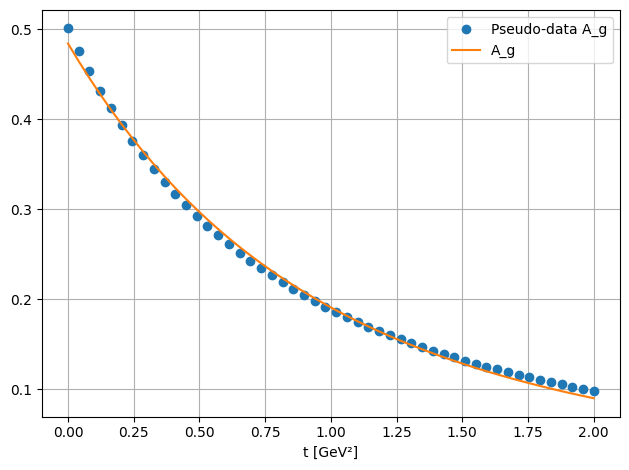

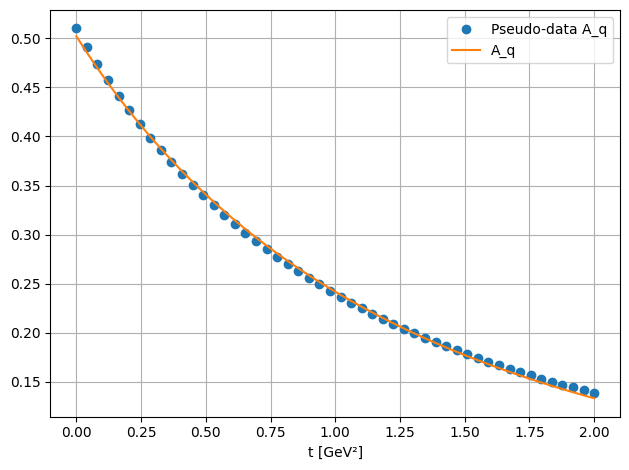

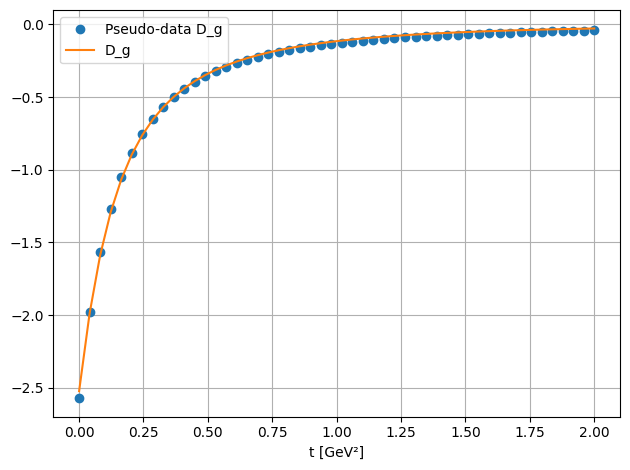

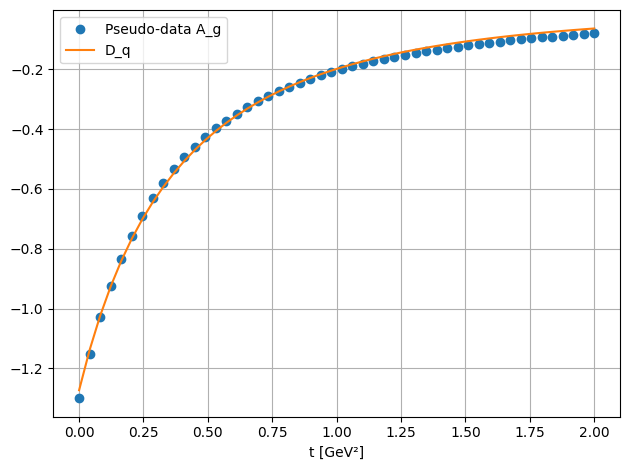

In [40]:
fit_singlet_slopes(evolution_order="NLO")

In [3]:
j_u_minus_d, j_u_minus_d_plus, j_u_minus_d_minus =  total_spin(0,2,particle="quark",moment_type="non_singlet_isovector")
j_u_plus_d, j_u_plus_d_plus, j_u_plus_d_minus =  total_spin(0,2,particle="quark",moment_type="non_singlet_isoscalar")
j_u = (j_u_minus_d + j_u_plus_d)/2
j_d = (j_u_plus_d - j_u_minus_d)/2
j_u_plus = np.sqrt(j_u_minus_d_plus**2+j_u_plus_d_plus**2)/2
j_u_minus = np.sqrt(j_u_minus_d_minus**2+j_u_plus_d_minus**2)/2
# print(l_u_minus_d_plus,l_u_minus_d_minus)
# print(l_u_plus_d_plus,l_u_plus_d_minus)
print(j_u_plus_d,j_u_plus_d_plus,j_u_plus_d_minus)
print(j_u_minus_d,j_u_minus_d_plus,j_u_minus_d_minus)
print(j_u,j_d)
print(j_u_plus,j_u_minus)
# print(l_u+l_d+l_s)

0.17089890717084838 0.02185827594749296 0.020865769369075665
0.4208675673440858 0.08602358143137934 0.08211755651547331
0.2958832372574671 -0.12498433008661872
0.04437860066991156 0.042363526232584235


Time for plot computation for parameters (eta,t,mu) = ((0.001, -0.001, 2)): 0.011715 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 0.012970 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.3333333333333333, -0.69, 2)): 0.009802 seconds
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/stringy-gpds/singlet_quark_GPD_Htilde.pdf


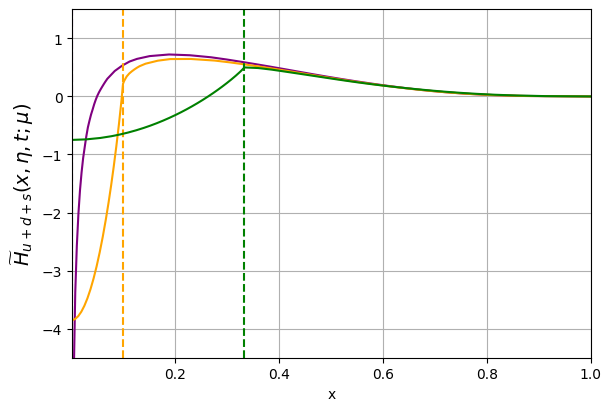

In [ ]:
eta_array = [1e-3,0.1,1/3]
t_array = [-1e-3,-0.23,-0.69]
mu_array = [2,2,2]
colors = ["purple","orange","green"]
plot_gpds(eta_array,t_array,mu_array,colors,particle="quark",gpd_type="singlet",gpd_label="Htilde",error_bars=False, read_from_file= True,write_to_file=False, y_0= -4.5, y_1 =1.5)

Time for plot computation for parameters (eta,t,mu) = ((0.001, -0.001, 2)): 0.027395 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 0.023764 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.3333333333333333, -0.69, 2)): 0.020663 seconds
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/stringy-gpds/non_singlet_isovector_quark_GPD_E.pdf


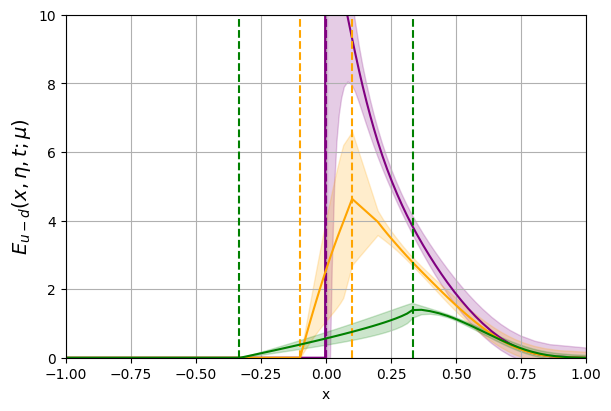

In [ ]:
eta_array = [1e-3,0.1,1/3]
t_array = [-1e-3,-0.23,-0.69]
mu_array = [2,2,2]
colors = ["purple","orange","green"]
plot_gpds(eta_array,t_array,mu_array,colors,gpd_type="non_singlet_isovector",gpd_label="E",error_bars=True, read_from_file= True,write_to_file=False, y_0= 0, y_1 =10)

Plots of conformal moments $\mathbb{G}(n,\eta,tb_\perp)$ in momentum space

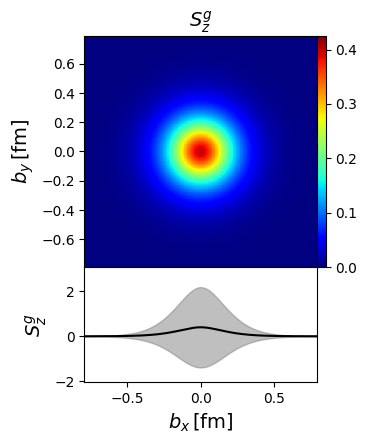

In [5]:
plot_fourier_transform_singlet_helicity(0,2,particle="gluon",read_from_file=True,write_to_file=False,b_max=4, n_b = 50, vmin=0,vmax=.425)

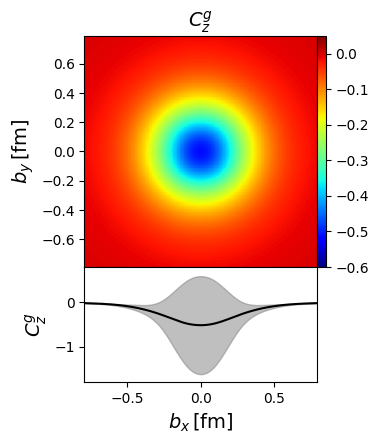

In [6]:
plot_fourier_transform_singlet_spin_orbit_correlation(0,2,particle="gluon",read_from_file=True,write_to_file=False,b_max=4, n_b = 50,Delta_max=8,vmin = -.6, vmax = 0.05 ,ymin=-1.8, ymax = .8)

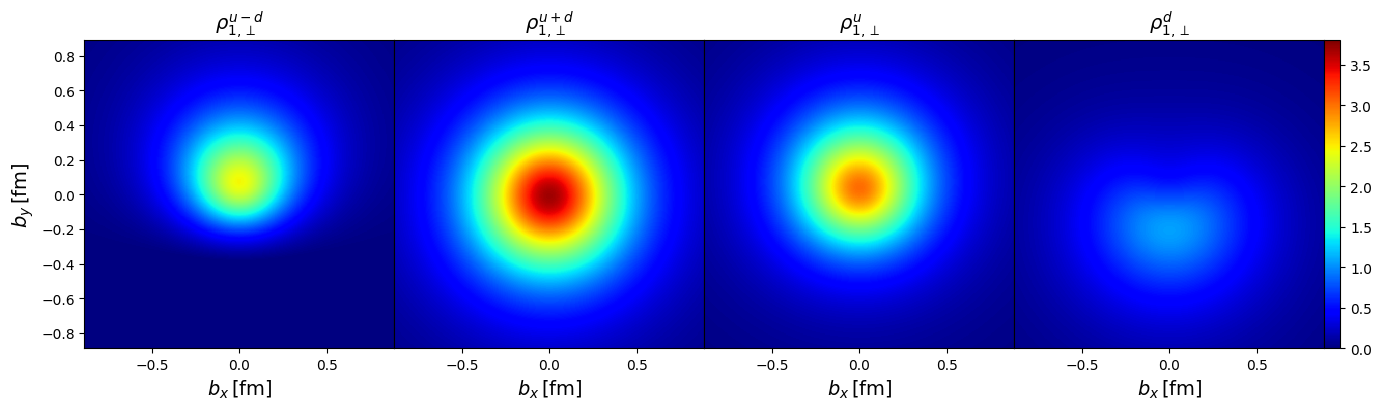

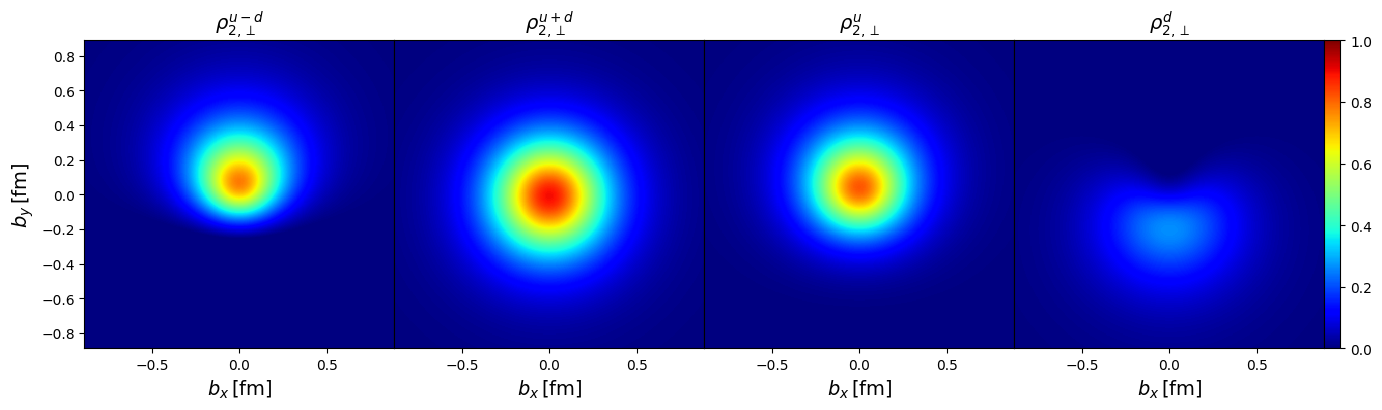

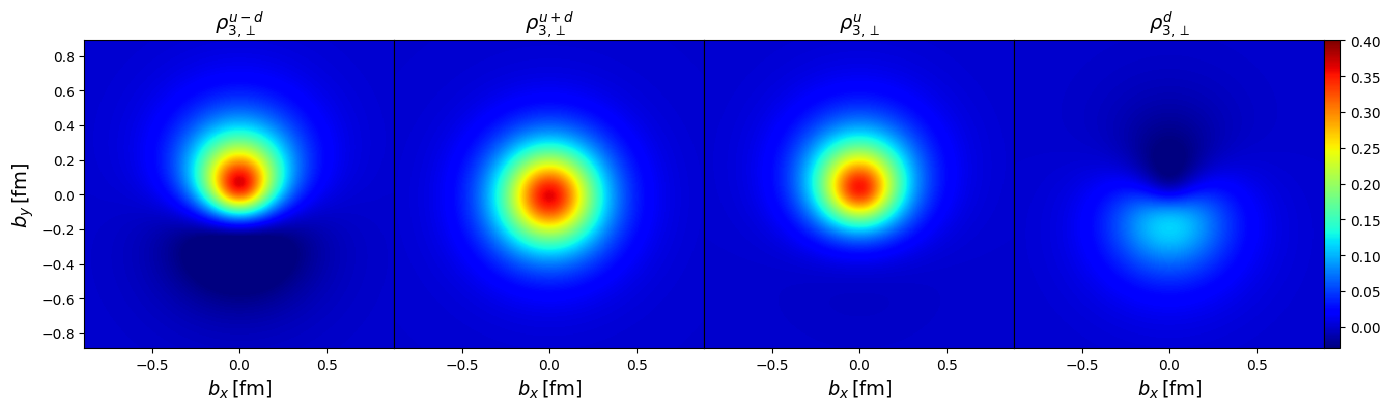

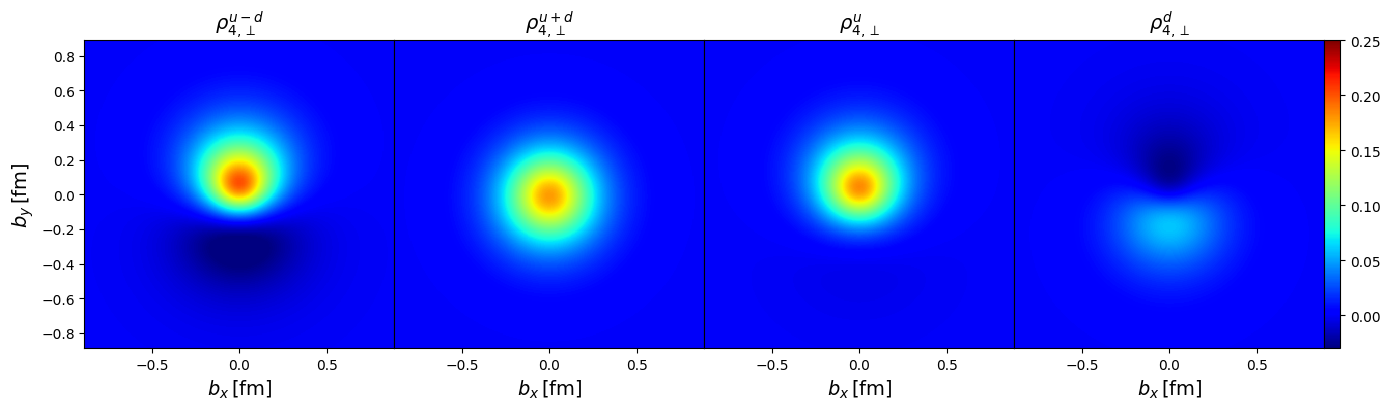

In [3]:
plot_fourier_transform_transverse_moments(1,0,2,moment_type="all",read_from_file=True,write_to_file=False,interpolation=True,vmin=0, vmax=3.8)
plot_fourier_transform_transverse_moments(2,0,2,moment_type="all",read_from_file=True,write_to_file=False,interpolation=True,vmin=0, vmax=1)
plot_fourier_transform_transverse_moments(3,0,2,moment_type="all",read_from_file=True,write_to_file=False,interpolation=True,vmin=-.03, vmax=.4)
plot_fourier_transform_transverse_moments(4,0,2,moment_type="all",read_from_file=True,write_to_file=False,interpolation=True,vmin=-.03, vmax=.25)

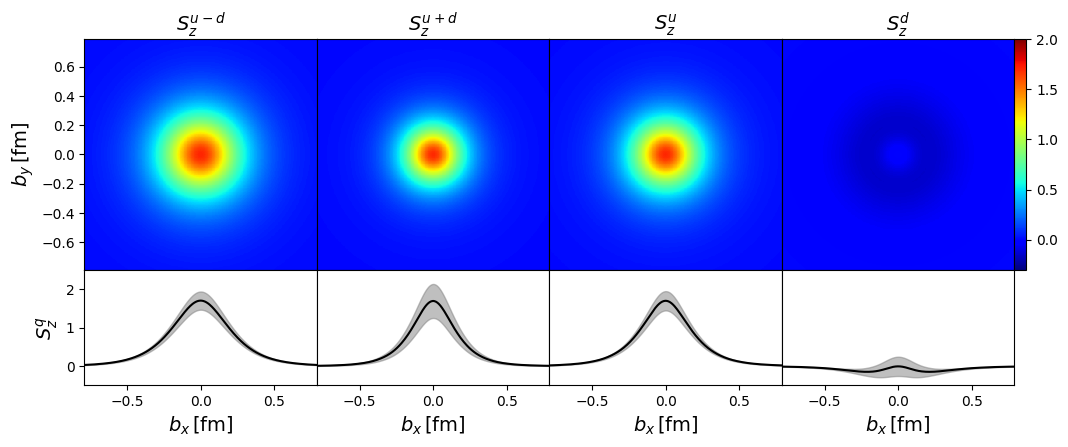

In [2]:
plot_fourier_transform_quark_helicity(0,2,read_from_file=True,write_to_file=False,b_max=4, n_b = 100,moment_type="all",vmin = -0.3, vmax = 2)

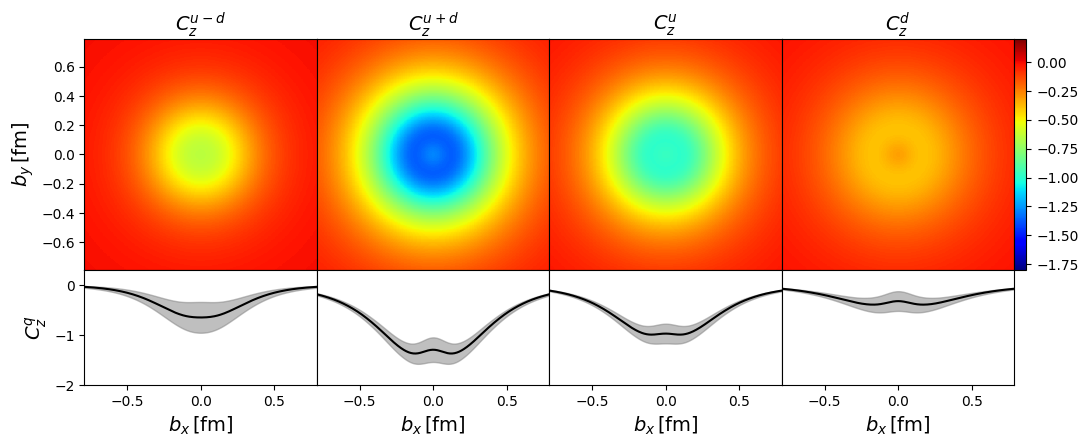

In [3]:
plot_fourier_transform_quark_spin_orbit_correlation(0,2,read_from_file=True,write_to_file=False,b_max=4, n_b = 100,moment_type="all",Delta_max=8,vmin = -1.8, vmax = .2,ymin=-2, ymax = .3)

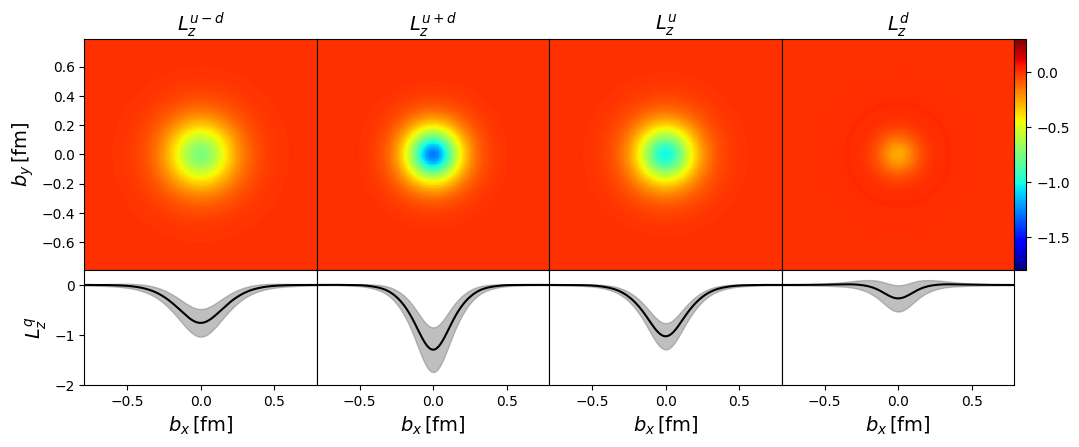

In [4]:
plot_fourier_transform_quark_orbital_angular_momentum(0,2,read_from_file=True,write_to_file=False,b_max=4, n_b = 100,moment_type="all",Delta_max=7,vmin = -1.8, vmax = .3,ymin=-2)

In [6]:
l_u_minus_d, l_u_minus_d_plus ,l_u_minus_d_minus = orbital_angular_momentum(0,2)
l_u_plus_d, l_u_plus_d_plus ,l_u_plus_d_minus = orbital_angular_momentum(0,2,moment_type="non_singlet_isoscalar")
l_s, _ ,_ = orbital_angular_momentum(0,2,moment_type="singlet")
l_u = (l_u_minus_d + l_u_plus_d)/2
l_d = (l_u_plus_d - l_u_minus_d)/2
l_u_plus = np.sqrt(l_u_minus_d_plus**2+l_u_plus_d_plus**2)/2
l_u_minus = np.sqrt(l_u_minus_d_minus**2+l_u_plus_d_minus**2)/2
# print(l_u_minus_d_plus,l_u_minus_d_minus)
# print(l_u_plus_d_plus,l_u_plus_d_minus)
print(l_u_plus_d,l_u_plus_d_plus,l_u_plus_d_minus)
print(l_u_minus_d,l_u_minus_d_plus,l_u_minus_d_minus)
print(l_u,l_d,l_s)
print(l_u_plus,l_u_minus)
# print(l_u+l_d+l_s)

-0.03515109816975892 0.06029649825648719 0.05994383876564187
-0.219103215838246 0.1182642498189208 0.11545418706579208
-0.12712715700400246 0.09197605883424353 0.0152597925474197
0.06637412991374476 0.06504408719665489


In [4]:
s_u_minus_d, s_u_minus_d_plus, s_u_minus_d_minus = quark_helicity(0,2,moment_type="non_singlet_isovector")
s_u_plus_d, s_u_plus_d_plus, s_u_plus_d_minus = quark_helicity(0,2,moment_type="non_singlet_isoscalar")
s_s, s_s_plus, s_s_minus= quark_helicity(0,2,moment_type="singlet")
s_g, s_g_plus, s_g_minus = gluon_helicity(0,2)
s_u = (s_u_plus_d+s_u_minus_d)/2
s_u_plus = np.sqrt(s_u_minus_d_plus**2+s_u_plus_d_plus**2)/2
s_u_minus = np.sqrt(s_u_minus_d_minus**2+s_u_plus_d_minus**2)/2
s_d = (s_u_plus_d-s_u_minus_d)/2
print(s_u_minus_d,s_u_minus_d_minus,s_u_minus_d_plus)
print(s_u_plus_d,s_u_plus_d_plus,s_u_plus_d_minus)
print(s_u,s_u_plus,s_u_minus)
print(s_d,s_u_plus,s_u_minus)
# print(s_s,s_s_plus,s_s_minus)
# print(s_g,s_g_plus,s_g_minus)
# print(s_u+s_d+s_s)
# print(s_g)

0.6399707831823318 0.08115649217992948 0.08115649217992948
0.2060500053406073 0.05619504848825929 0.05619504848825929
0.4230103942614696 0.049356508429863555 0.049356508429863555
-0.21696038892086225 0.049356508429863555 0.049356508429863555


In [5]:
c_u_minus_d, c_u_minus_d_plus, c_u_minus_d_minus = spin_orbit_corelation(0,2,moment_type="non_singlet_isovector")
c_u_plus_d, c_u_plus_d_plus, c_u_plus_d_minus = spin_orbit_corelation(0,2,moment_type="non_singlet_isoscalar")
c_u = (c_u_plus_d+c_u_minus_d)/2
c_u_plus = np.sqrt(c_u_minus_d_plus**2+c_u_plus_d_plus**2)/2
c_u_minus = np.sqrt(c_u_minus_d_minus**2+c_u_plus_d_minus**2)/2
c_d = (c_u_plus_d-c_u_minus_d)/2
print(c_u_minus_d,c_u_minus_d_minus,c_u_minus_d_plus)
print(c_u_plus_d,c_u_plus_d_plus,c_u_plus_d_minus)
print(c_u,c_u_plus,c_u_minus)
print(c_d,c_u_plus,c_u_minus)

-0.39844253802641905 0.17950598244725235 0.17043054856399925
-1.4625505084866472 0.17010833004615744 0.1792000831518223
-0.9304965232565332 0.12039872905778339 0.12682179183402717
-0.532053985230114 0.12039872905778339 0.12682179183402717


In [ ]:
def total_spin(t,mu):
    j_u_minus_d, j_u_minus_d_plus ,j_u_minus_d_minus= total_spin(t,mu)
    j_u_plus_d, j_u_plus_d_plus , j_u_plus_d_minus = total_spin(t,mu,moment_type="non_singlet_isoscalar")
    j_s, j_s_plus, j_s_minus = total_spin(t,mu,moment_type="singlet")
    j_g, j_g_plus ,j_g_minus = total_spin(t,mu,particle="gluon",moment_type="singlet")

    j_u = (j_u_minus_d+j_u_plus_d)/2
    j_d = (j_u_plus_d-j_u_minus_d)/2
    j_u_plus = np.sqrt((j_u_minus_d_plus)**2+(j_u_plus_d_plus)**2)/2
    j_u_minus = np.sqrt((j_u_minus_d_minus)**2+(j_u_plus_d_minus)**2)/2
    error_plus = np.sqrt(2*j_u_plus**2+j_s_plus**2+j_g_plus**2)
    error_minus= np.sqrt(2*j_u_minus**2+j_s_minus**2+j_g_minus**2)
    print(j_u + j_d + j_s + j_g, f'({error_plus})({error_minus})')

0.368205268227426 (0.0691794005656669)(0.0679402889812622)


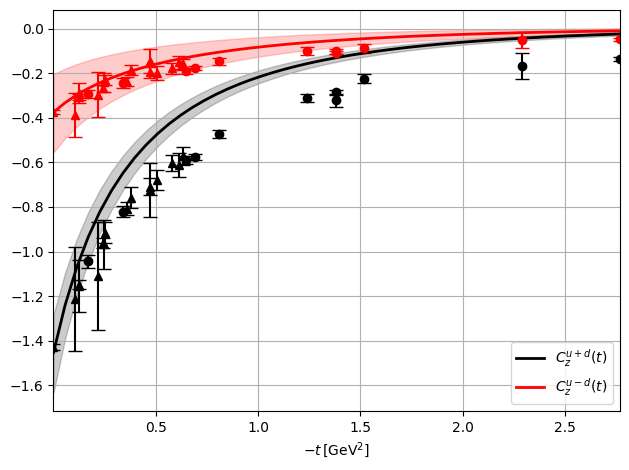

In [2]:
plot_spin_orbit_correlation()

Plots of conformal moments $\mathbb{G}(n,\eta,t)$ in momentum space

In [8]:
from stringy_gpds import plot_moments_on_grid

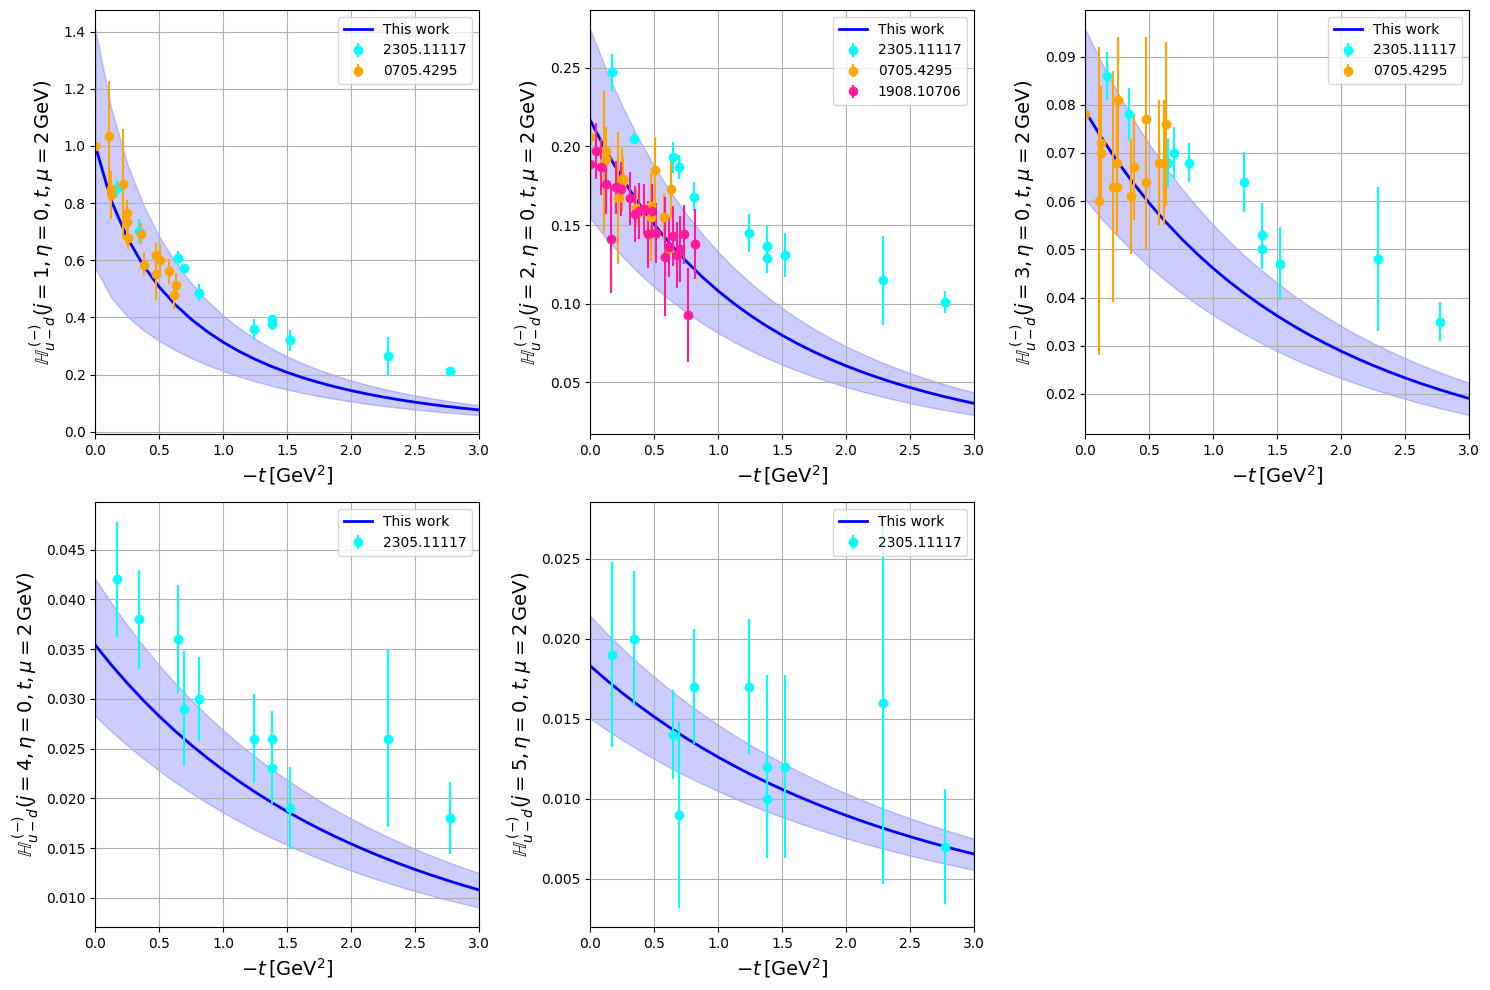

In [2]:
#non_singlet_isovector
y_label = "$\\mathbb{{H}}_{{u-d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isovector"
moment_label = "A"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

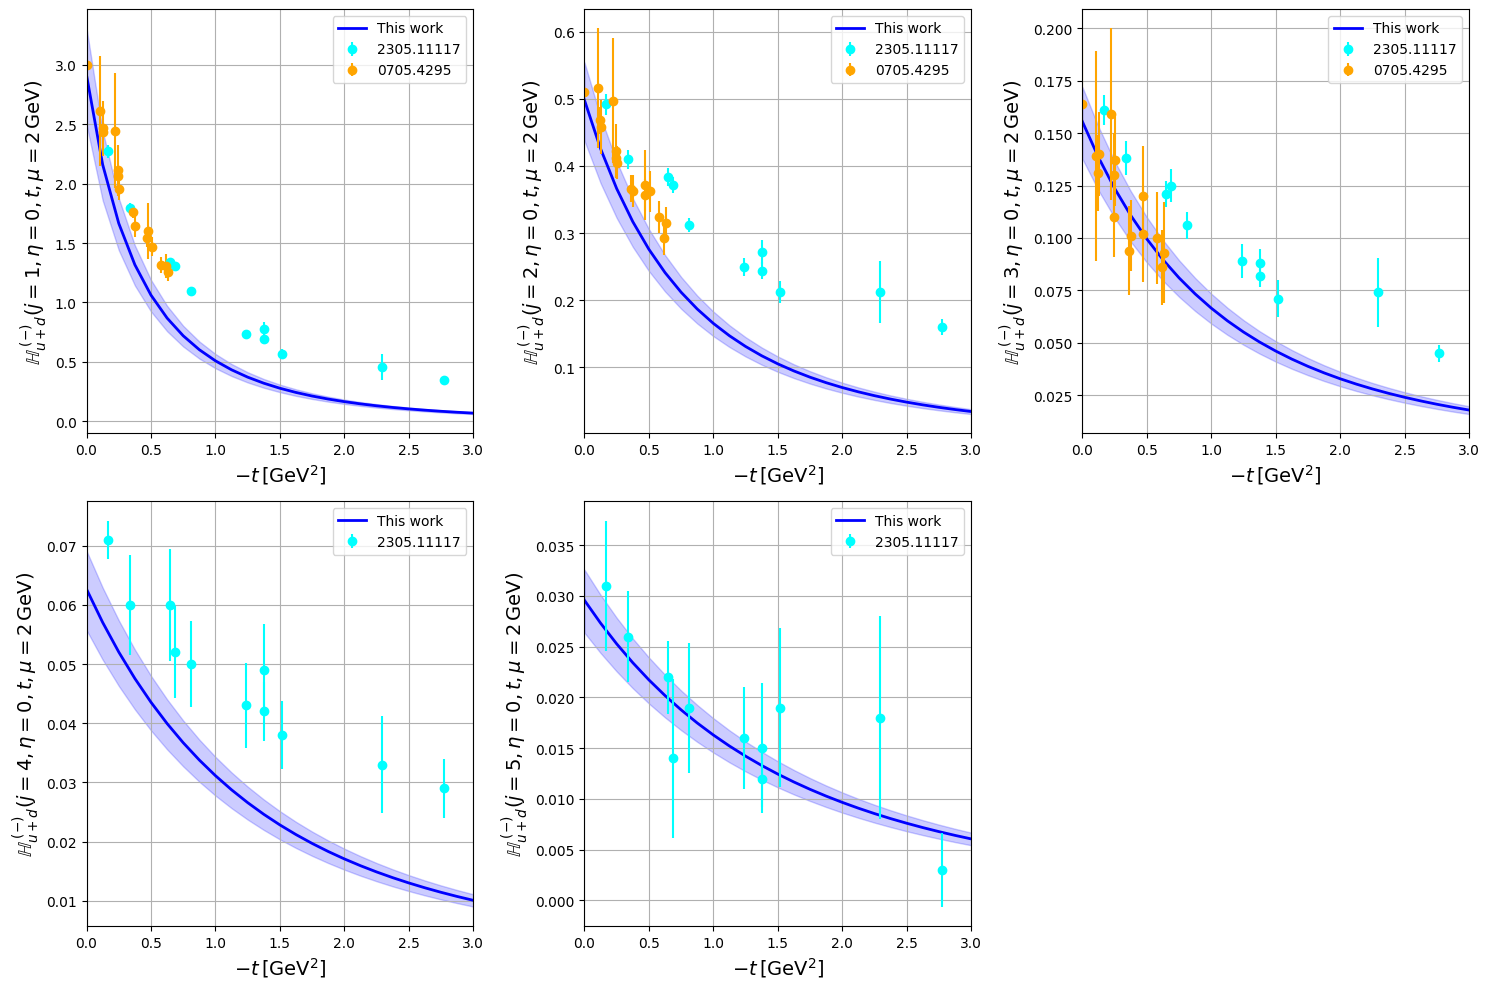

In [3]:
# non_singlet_isoscalar
y_label = "$\\mathbb{{H}}_{{u+d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isoscalar"
moment_label = "A"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

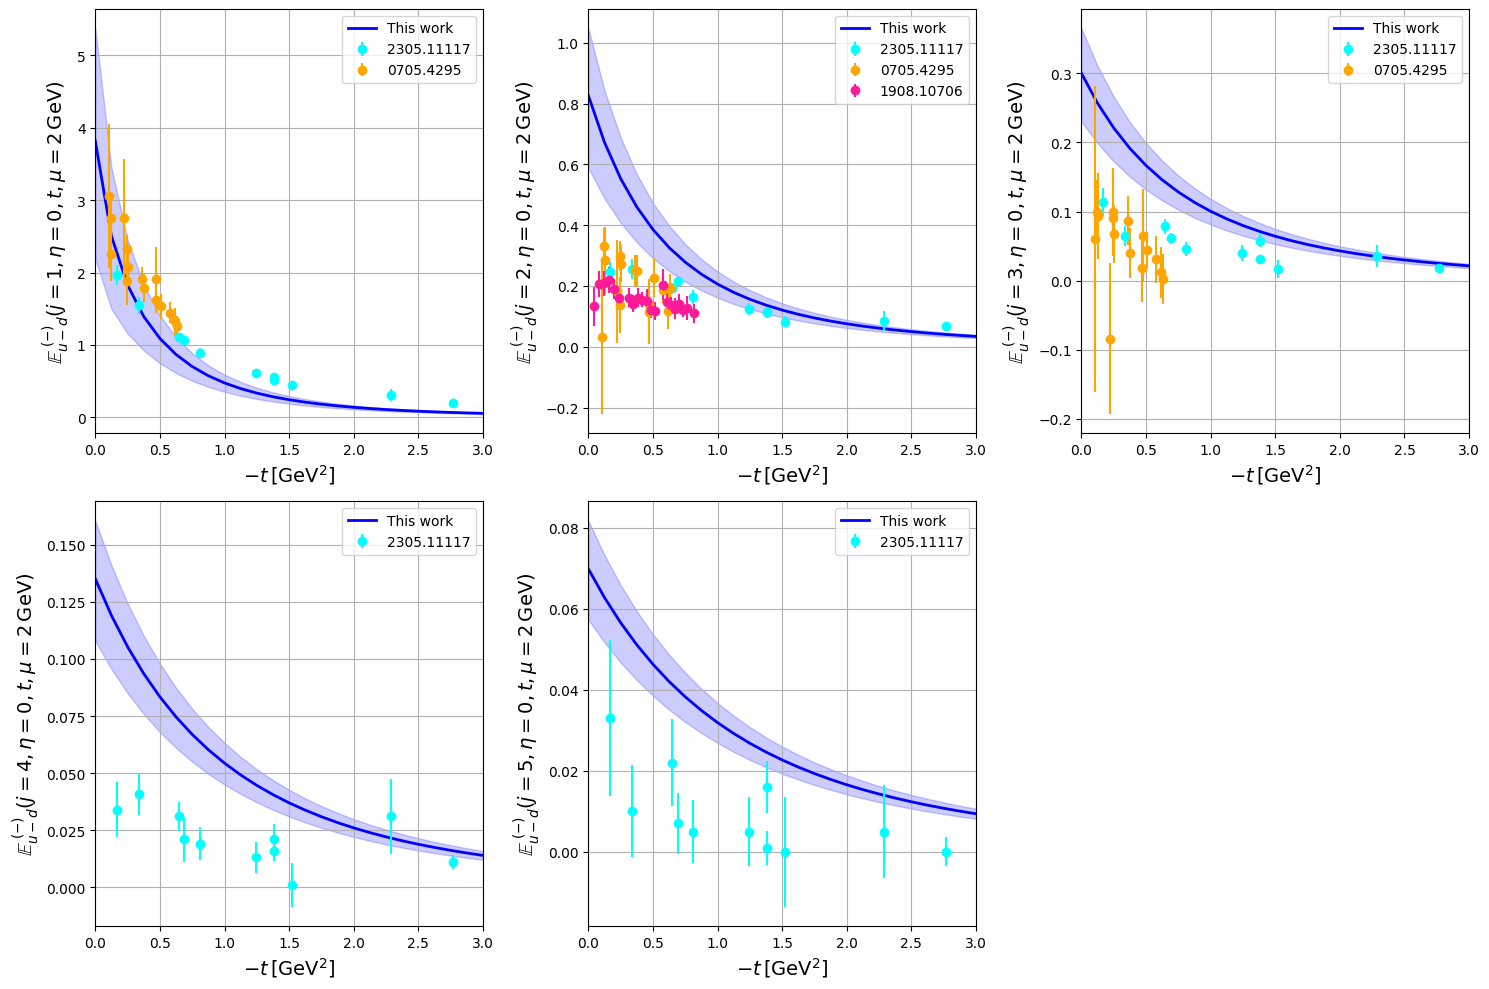

In [4]:
#non_singlet_isovector
y_label = "$\\mathbb{{E}}_{{u-d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isovector"
moment_label = "B"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

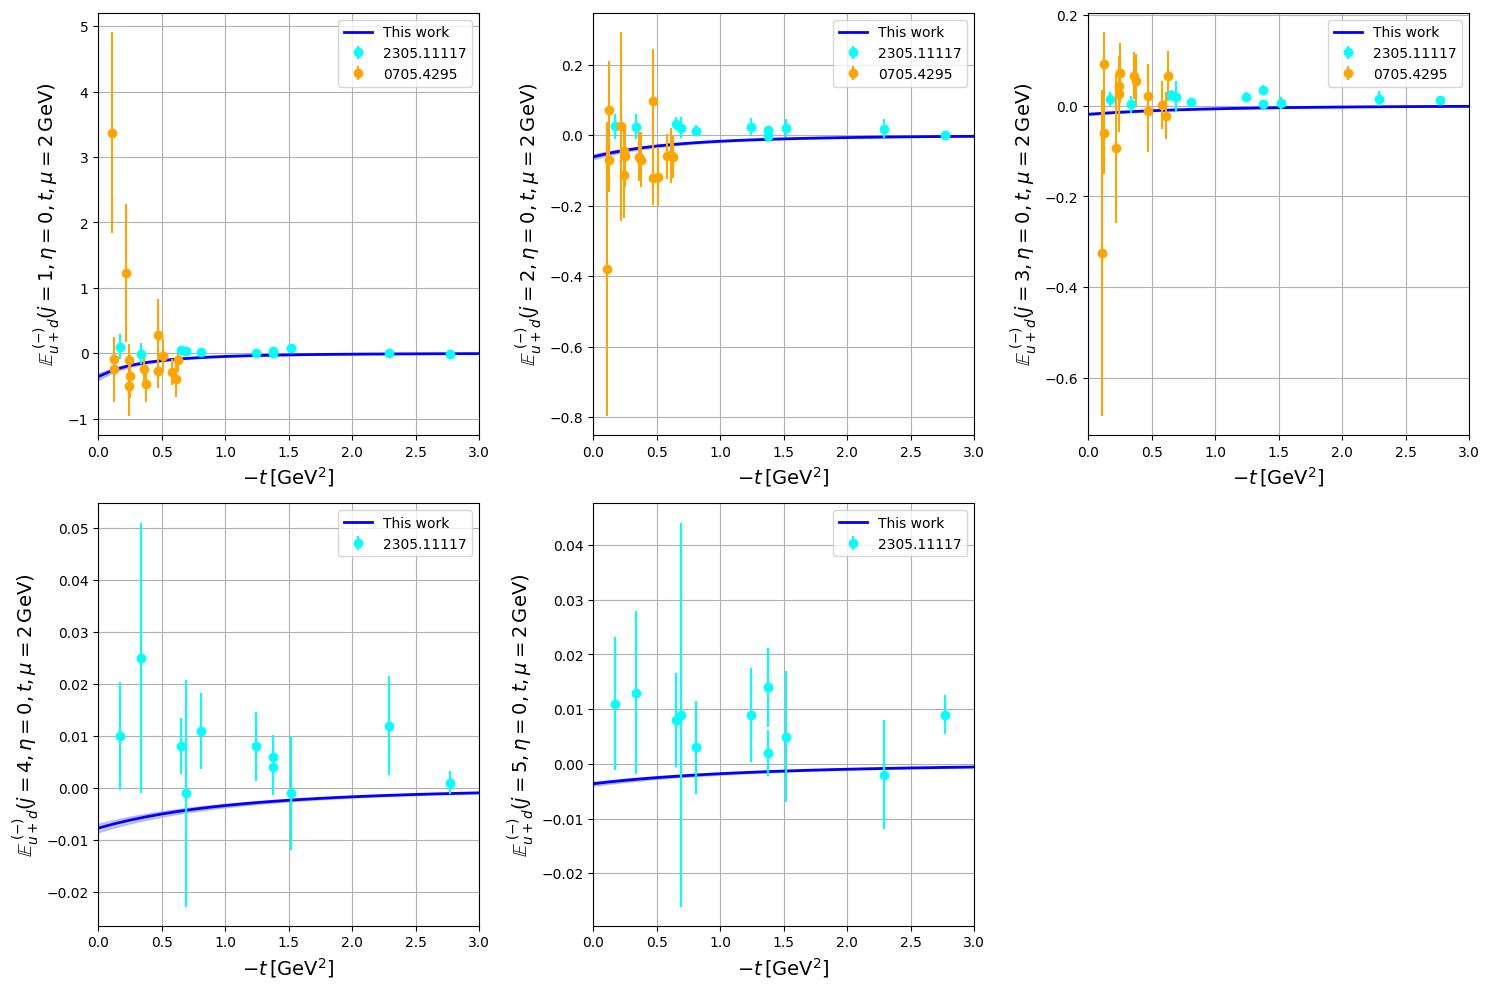

In [5]:
# non_singlet_isoscalar
y_label = "$\\mathbb{{E}}_{{u+d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isoscalar"
moment_label = "B"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

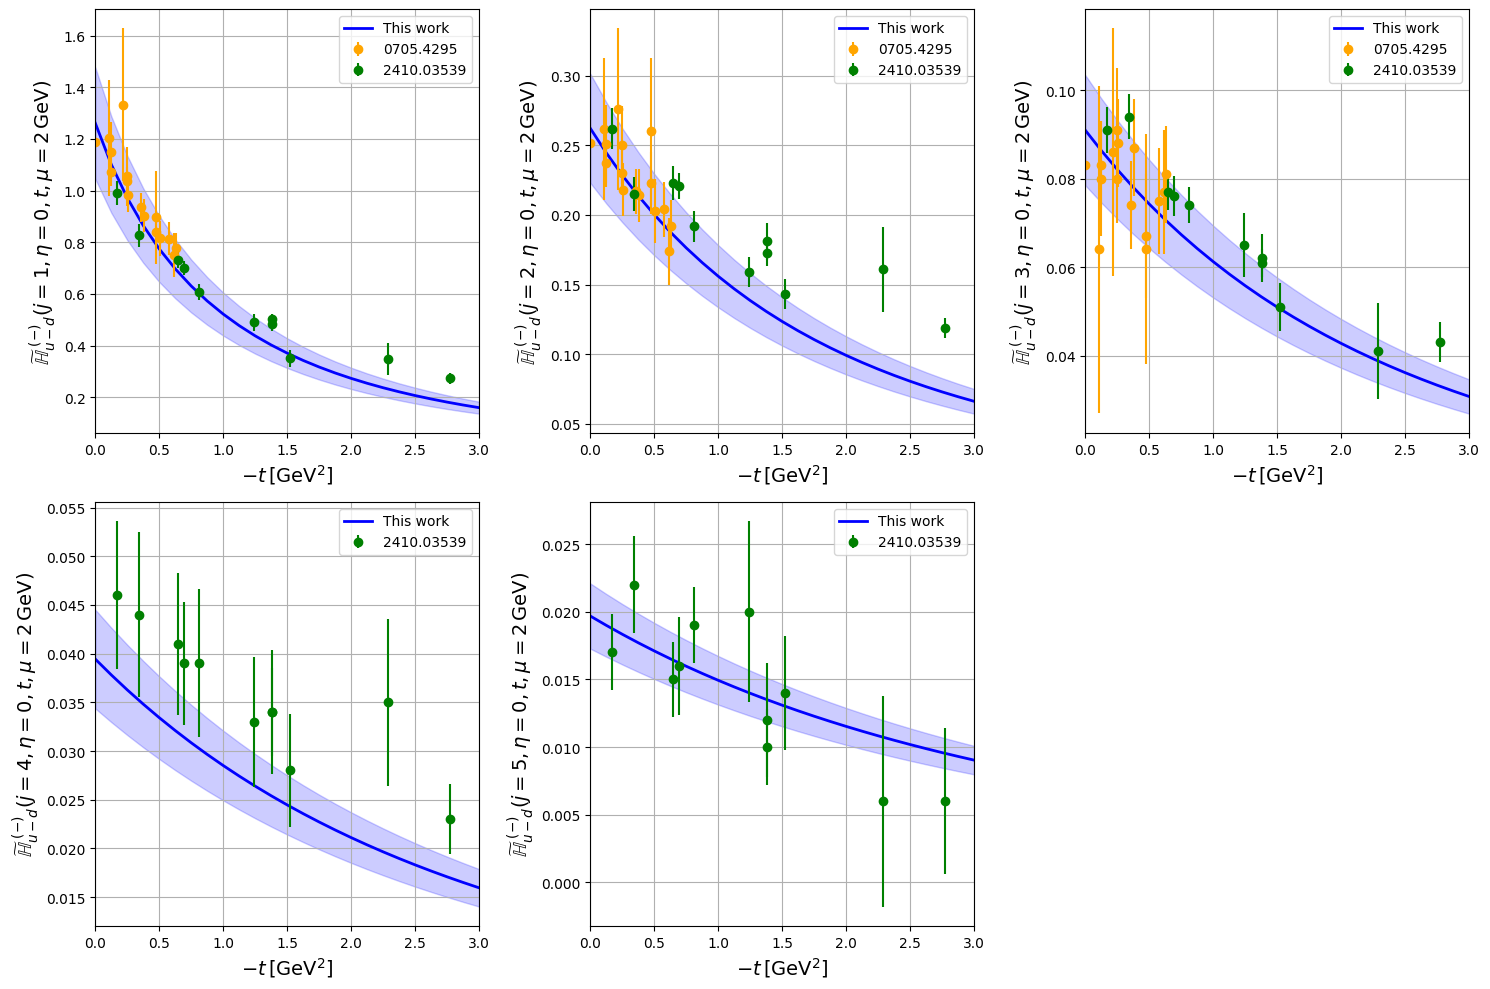

In [6]:
#non_singlet_isovector Axial
y_label = "$\\widetilde{\\mathbb{{H}}}_{{u-d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isovector"
moment_label = "Atilde"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

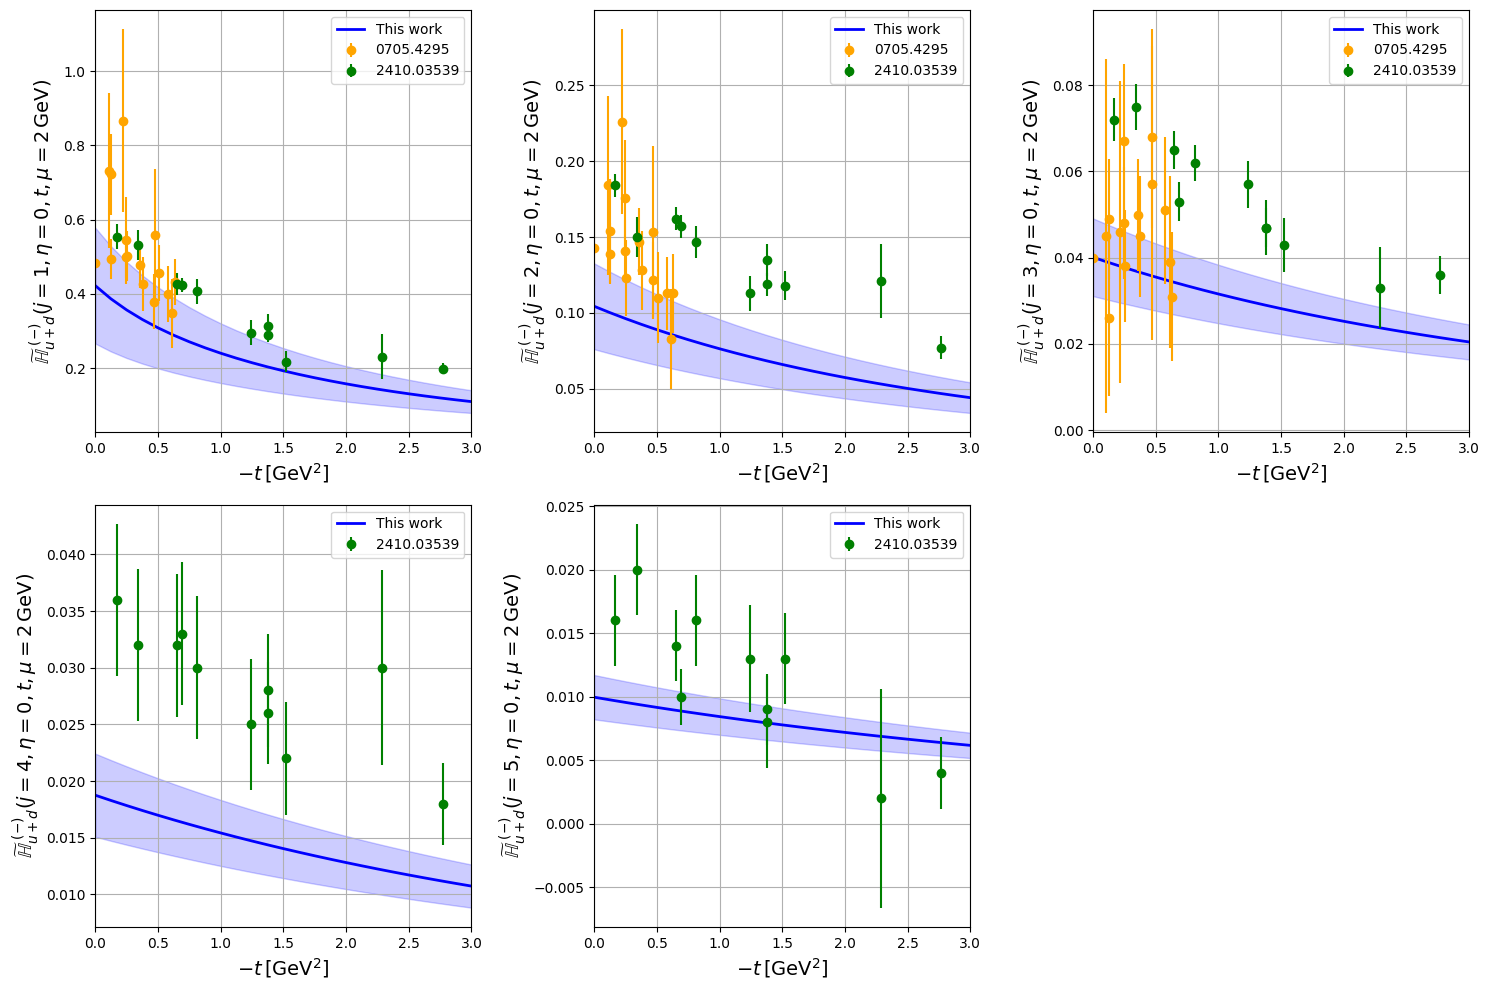

In [7]:
#non_singlet_isoscalar Axial
y_label = "$\\widetilde{\\mathbb{{H}}}_{{u+d}}^{{\,\,(-)}}$"
moment_type = "non_singlet_isoscalar"
moment_label = "Atilde"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

In [2]:
from stringy_gpds import evolve_conformal_moment
A0q = 0.51/evolve_conformal_moment(2,0,0,2,moment_type="singlet",particle="quark",evolution_order="NLO")
A0g = 0.501/evolve_conformal_moment(2,0,0,2,moment_type="singlet",particle="gluon",evolution_order="NLO")
print(A0q,A0g)

0.7898982411187685 1.4138908580914216


In [3]:
from stringy_gpds import plot_moments_on_grid

In [3]:
import config as cfg

cfg.memory.clear(warn=False)

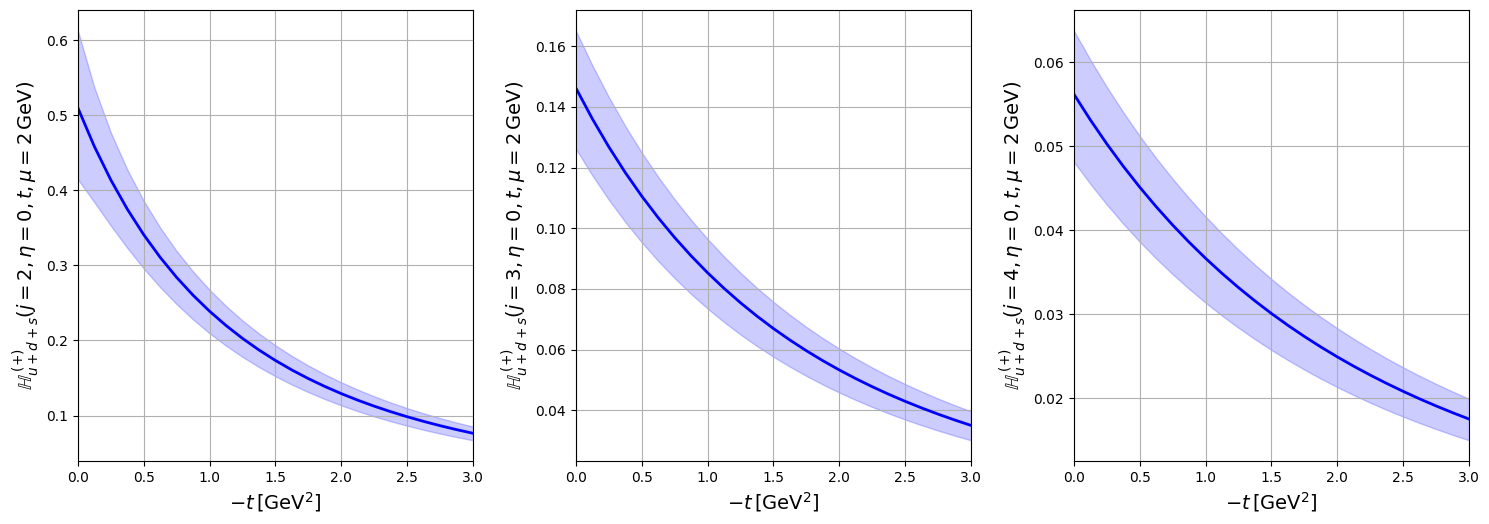

In [4]:
# Sea Quark singlet
y_label = "$\\mathbb{{H}}_{{u+d+s}}^{{\,\,(+)}}$"
moment_type = "singlet"
moment_label = "A"

plot_moments_on_grid(0,y_label,3,3,A0q,"quark",moment_type, moment_label,"NLO",25)

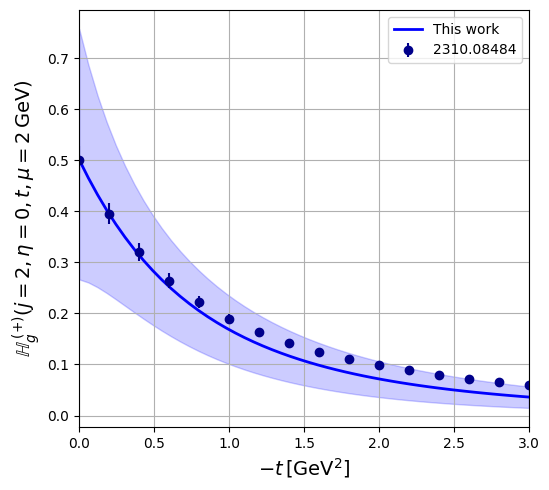

In [5]:
from stringy_gpds import plot_moments_on_grid
y_label = "$\\mathbb{{H}}_{{g}}^{{\,\,(+)}}$"
particle = "gluon"
moment_type = "singlet"
moment_label = "A"
plot_moments_on_grid(0,y_label,3,3,A0g,particle,moment_type,moment_label,evolution_order="NLO",n_t=50)

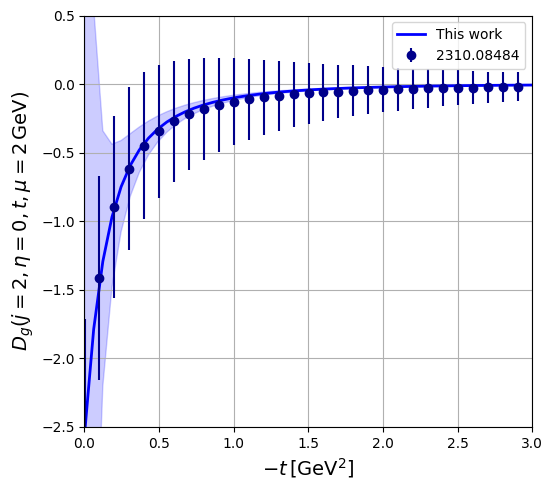

In [17]:
y_label = "$D_{{g}}$"
particle = "gluon"
moment_type = "singlet"
moment_label = "A"
plot_moments_on_grid(1,y_label,3,3,D0g,particle,moment_type,moment_label,D_term=True,y_0 = -2.5, y_1=.5,set_y_lim=True,evolution_order="NLO")

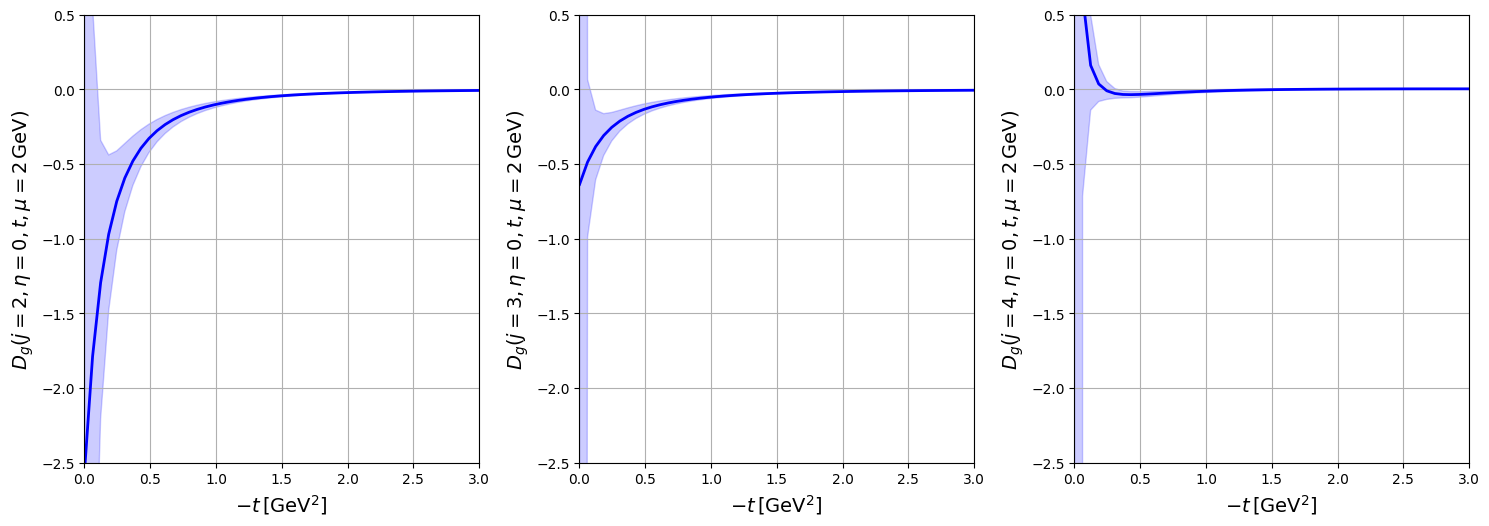

In [15]:
y_label = "$D_{{g}}$"
particle = "gluon"
moment_type = "singlet"
moment_label = "A"
plot_moments_on_grid(1,y_label,3,3,D0g,particle,moment_type,moment_label,D_term=True,y_0 = -2.5, y_1=.5,set_y_lim=True,evolution_order="NLO")

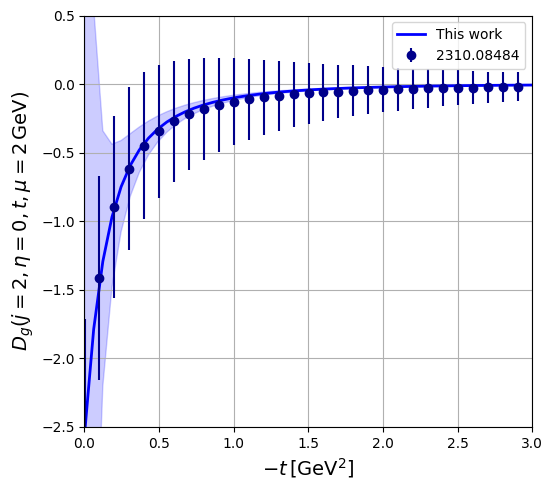

In [18]:
y_label = "$D_{{g}}$"
particle = "gluon"
moment_type = "singlet"
moment_label = "A"
plot_moments_on_grid(0,y_label,3,3,D0g,particle,moment_type,moment_label,D_term=True,y_0 = -2.5, y_1=.5,set_y_lim=True,evolution_order="NLO")

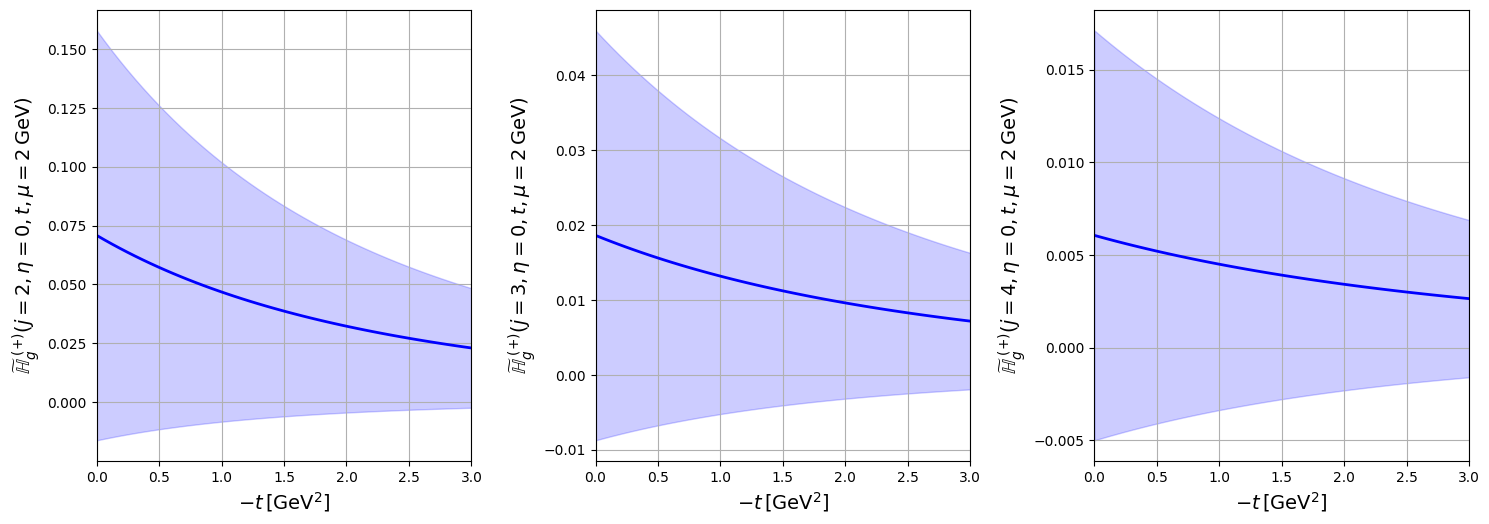

In [7]:
# Gluon singlet
y_label = "$\\widetilde{\\mathbb{{H}}}_{{g}}^{{\,\,(+)}}$"
moment_type = "singlet"
moment_label = "Atilde"

plot_moments_on_grid(0,y_label,3,3,1,"gluon",moment_type, moment_label,evolution_order="NLO")

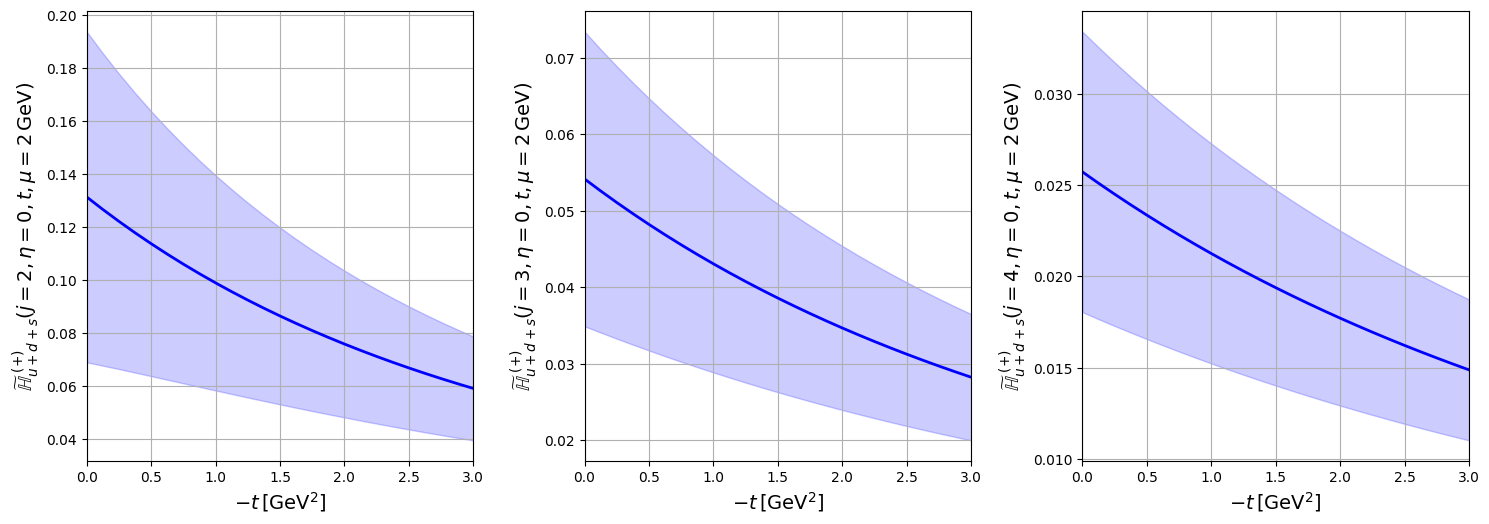

In [9]:
# Sea Quark singlet
y_label = "$\\widetilde{\\mathbb{{H}}}_{{u+d+s}}^{{\,\,(+)}}$"
moment_type = "singlet"
moment_label = "Atilde"

plot_moments_on_grid(0,y_label,3,3,1,"quark",moment_type, moment_label,"NLO",25)

Plots of GPDs through Mellin-Barnes Integral

Time for plot computation for parameters (eta,t,mu) = ((0.001, -0.001, 2)): 0.024125 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 0.022588 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.3333333333333333, -0.69, 2)): 0.024590 seconds
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/stringy-gpds/non_singlet_isoscalar_quark_GPD_Htilde.pdf


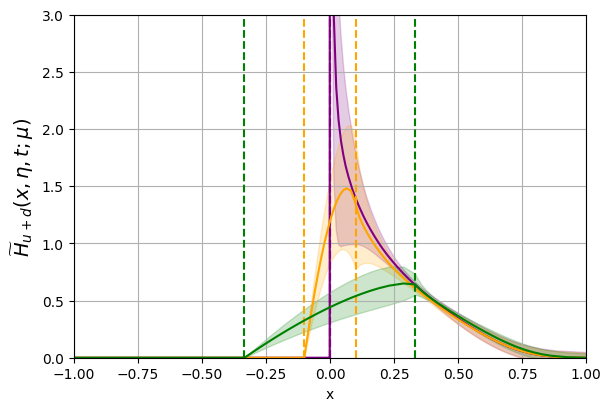

In [ ]:
eta_array = [1e-3,0.1,1/3]
t_array = [-1e-3,-0.23,-0.69]
mu_array = [2,2,2]
colors = ["purple","orange","green"]
plot_gpds(eta_array,t_array,mu_array,colors,particle="quark",gpd_type="non_singlet_isoscalar",gpd_label="Htilde",read_from_file=True, write_to_file=False,y_0=0,y_1=3,plot_legend=False)

Time for plot computation for parameters (eta,t,mu) = ((0.001, -0.001, 2)): 0.036008 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 0.036237 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.3333333333333333, -0.69, 2)): 0.039108 seconds
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/stringy-gpds/non_singlet_isoscalar_quark_GPD_E.pdf


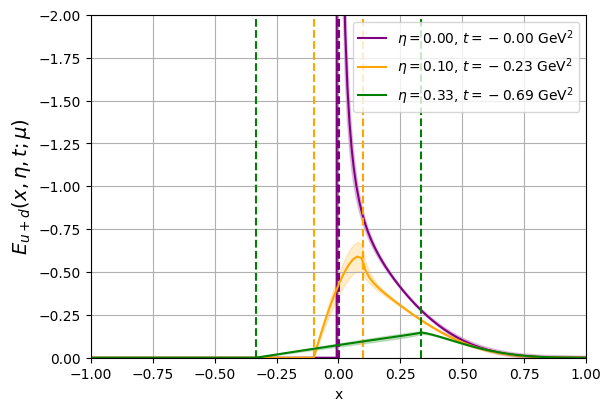

In [ ]:
eta_array = [1e-3,0.1,1/3]
t_array = [-1e-3,-0.23,-0.69]
mu_array = [2,2,2]
colors = ["purple","orange","green"]
plot_gpds(eta_array,t_array,mu_array,colors,particle="quark",gpd_type="non_singlet_isoscalar",gpd_label="E",read_from_file=True, write_to_file=False,y_0=0,y_1=-2,plot_legend=True)

Time for plot computation for parameters (eta,t,mu) = ((0.001, -0.001, 2)): 0.049581 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.1, -0.23, 2)): 0.038945 seconds
Time for plot computation for parameters (eta,t,mu) = ((0.3333333333333333, -0.69, 2)): 0.030953 seconds
File saved to /mnt/c/Users/flori/Documents/PostDoc/Plots/GPD/NonSingletIsovectorquarkGPD_E.pdf


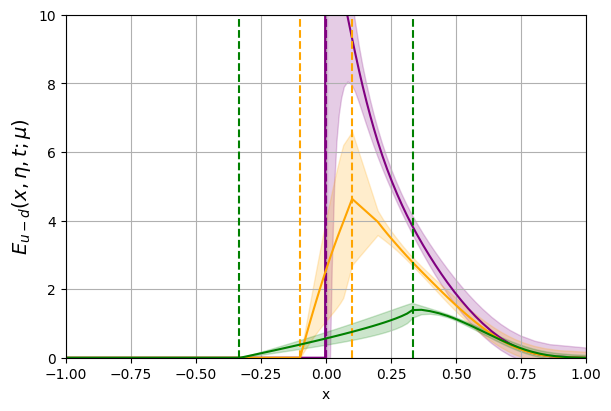

In [ ]:
eta_array = [1e-3,0.1,1/3]
t_array = [-1e-3,-0.23,-0.69]
mu_array = [2,2,2]
colors = ["purple","orange","green"]
plot_gpds(eta_array,t_array,mu_array,colors,particle="quark",gpd_type="non_singlet_isovector",gpd_label="E",read_from_file=True, write_to_file=False,y_0=0,y_1=10)

/home/hechenvanmountain/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


Time for plot computation for parameters (eta,t) = ((0.0, -0.69)): 0.037388 seconds
Time for plot computation for parameters (eta,t) = ((0.33, -0.69)): 0.026723 seconds
Time for plot computation for parameters (eta,t) = ((0.1, -0.23)): 0.027040 seconds


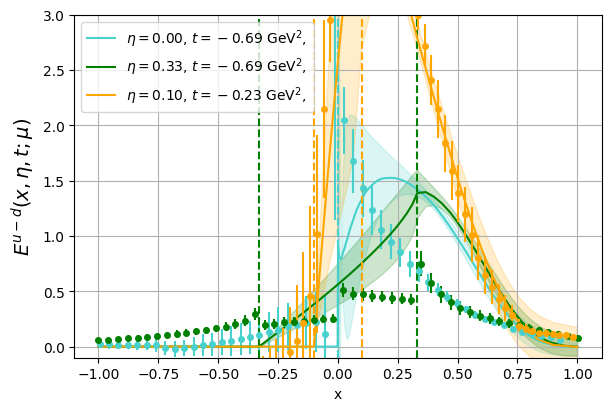

In [ ]:
plot_gpd_data(particle="quark",gpd_type="non_singlet_isovector",gpd_label="E",read_from_file=True,write_to_file=False,plot_legend=True)

/home/hechenvanmountain/.local/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


Time for plot computation for parameters (eta,t) = ((0.0, -0.69)): 0.031749 seconds
Time for plot computation for parameters (eta,t) = ((0.33, -0.69)): 0.033551 seconds
Time for plot computation for parameters (eta,t) = ((0.0, -0.39)): 0.033198 seconds


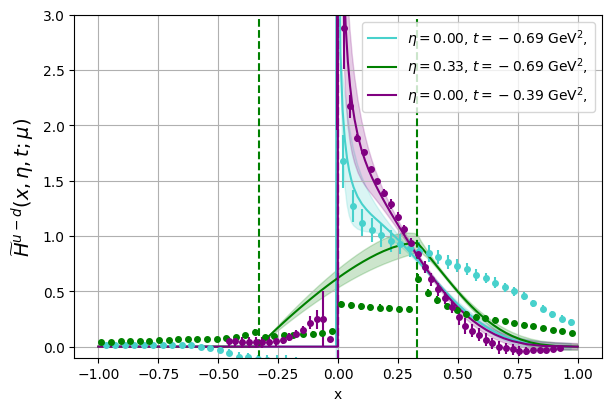

In [ ]:
plot_gpd_data(particle="quark",gpd_type="non_singlet_isovector",gpd_label="Htilde",read_from_file=True,write_to_file=False,plot_legend=True)